<a href="https://colab.research.google.com/github/dharaaani/COMP530---Alzheimer-s-Disease-/blob/main/Group-9-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
# Install required packages.
import os
import torch
import torchdata.datapipes as dp
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install networkx

import torch_geometric
from torch_geometric.data import InMemoryDataset
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Experiments

## Selecting a minimum similarity threshold for edges

In [ ]:
def build_data_pipe(csv_file):
    new_dp = dp.iter.FileOpener([csv_file])

    new_dp = new_dp.parse_csv(skip_lines=1, delimiter=",")

    return new_dp

def create_graph(threshold):
    protein_similarities = build_data_pipe("protein_adjacency_matrix.csv")

    edges = []
    edge_w = []
    node_features = []
    for node_i, v in enumerate(protein_similarities):
        most_similar_node = None
        best_similarity = 0
        is_alone = True
        similarities = v[2:]
        for node_j, similarity_str in enumerate(similarities):
            similarity = float(similarity_str)
            # Only have edges that have meet threshold
            if similarity >= threshold and similarity != 1:
                edges.append([node_i, node_j])
                edge_w.append(1)
                is_alone = False
            if best_similarity < similarity and similarity != 1:
                best_similarity = similarity
                most_similar_node = node_j
        if is_alone:
            edges.append([node_i, most_similar_node])
            edge_w.append(1)
        node_features.append(node_i)

    edge_index = torch.tensor(edges)
    edge_weight = torch.tensor(edge_w)
    x = torch.tensor(node_features)

    data = torch_geometric.data.Data(x=x, edge_index=edge_index.t())
    g = torch_geometric.utils.to_networkx(data, to_undirected=True)

    return g


Threshold 0.4
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


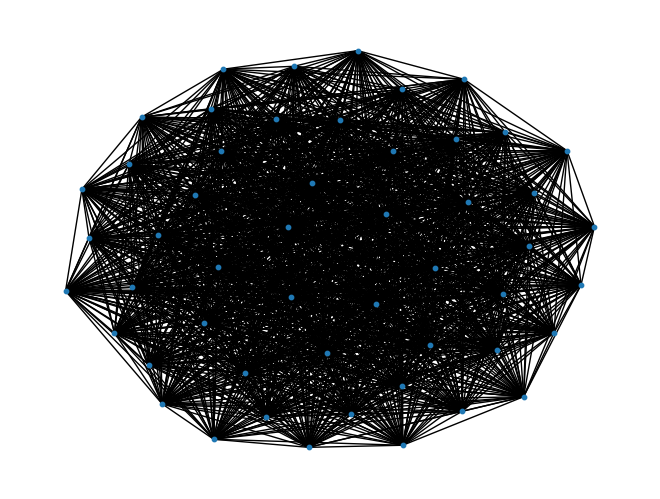

Threshold 0.42
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


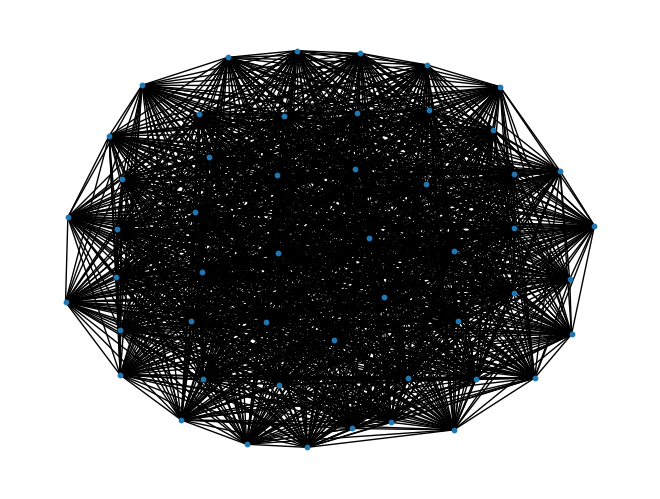

Threshold 0.44
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


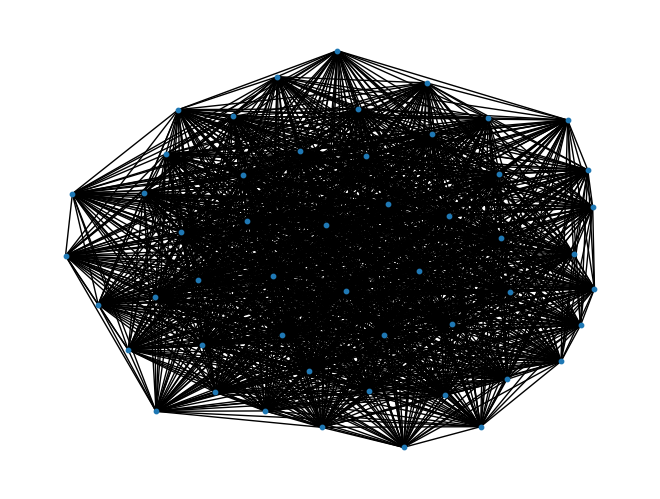

Threshold 0.46
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


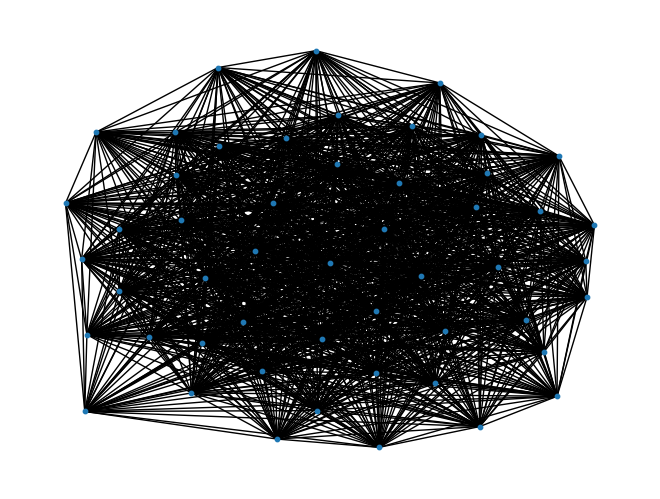

Threshold 0.48
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


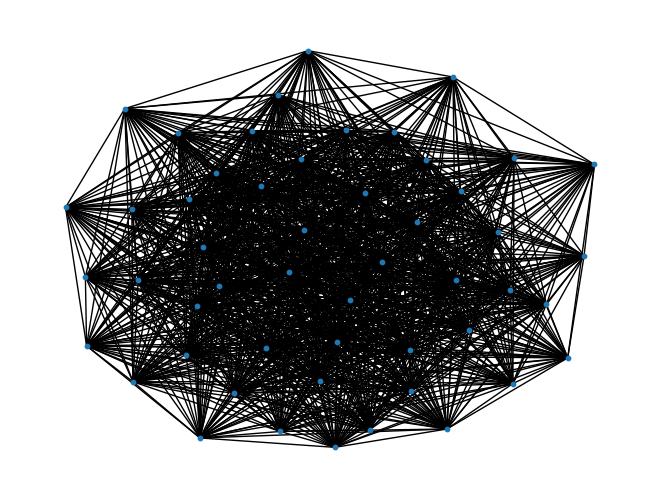

Threshold 0.5
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


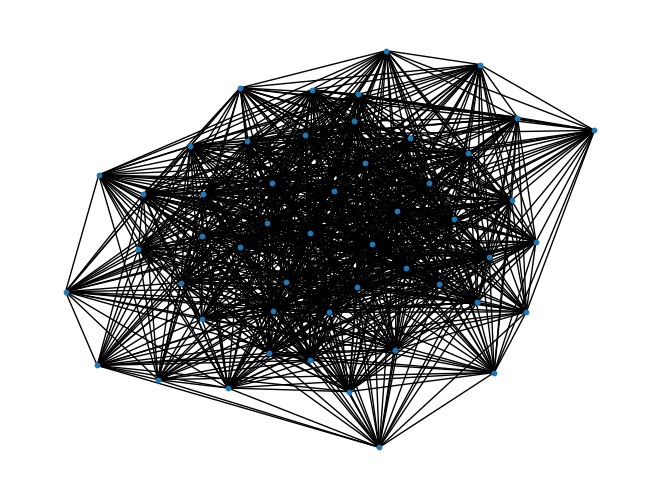

Threshold 0.52
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


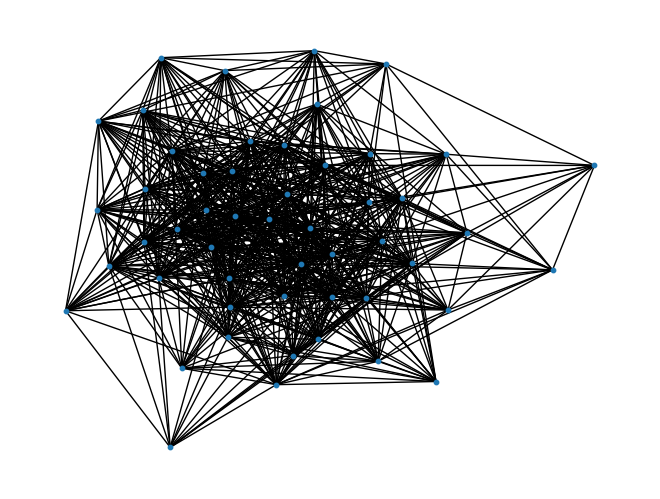

Threshold 0.54
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


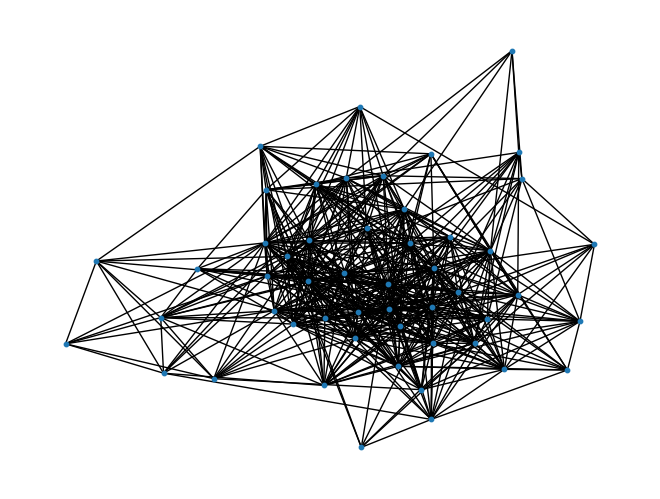

Threshold 0.56
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


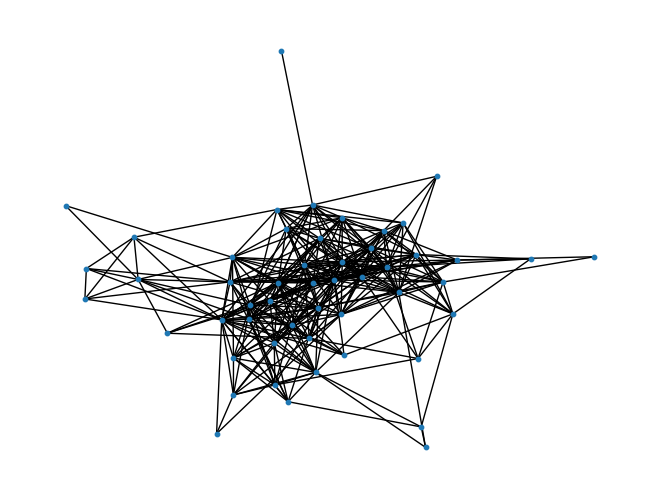

Threshold 0.58
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


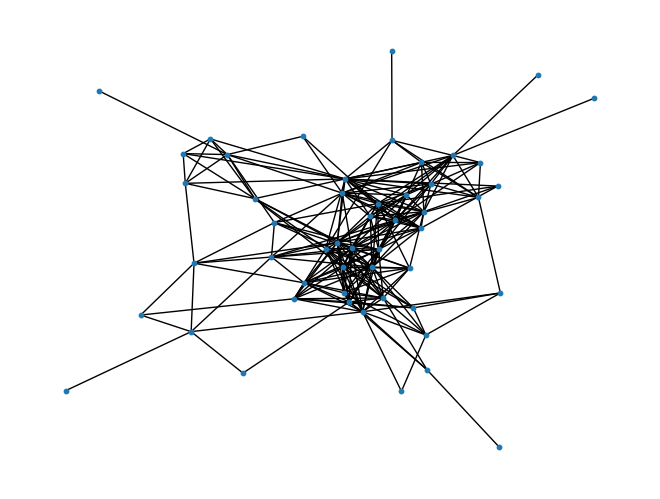

Threshold 0.6
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


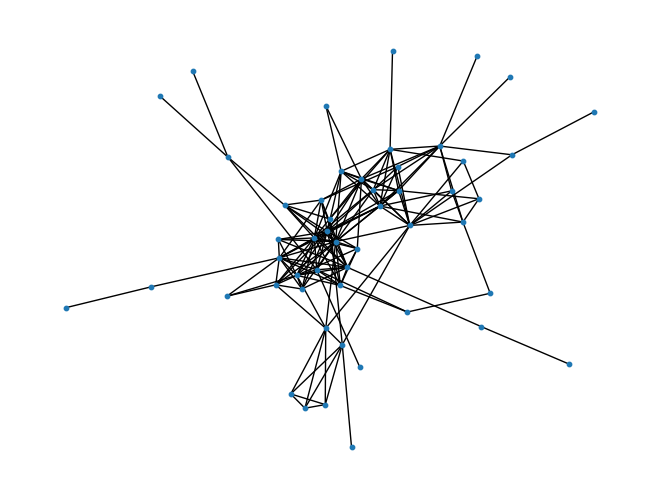

Threshold 0.62
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


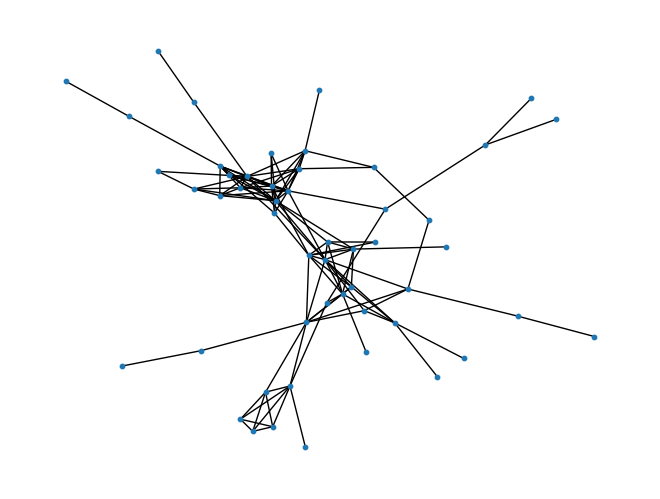

Threshold 0.64
Connected Components: [{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50}, {2, 18, 20, 23, 29}, {33, 35, 38, 41, 42, 12}]


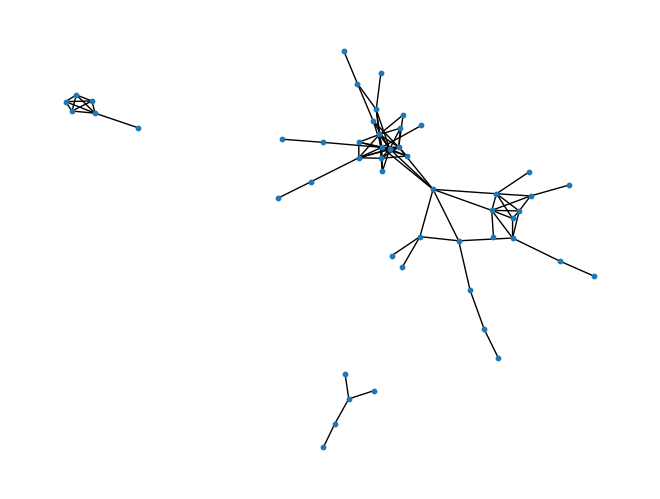

Threshold 0.66
Connected Components: [{0, 1, 5, 6, 7, 8, 9, 13, 14, 15, 16, 19, 21, 22, 26, 40, 43, 48, 50}, {2, 18, 20, 23, 29}, {3, 4, 10, 11, 17, 24, 25, 27, 28, 30, 31, 32, 34, 36, 37, 39, 44, 45, 46, 47, 49}, {33, 35, 38, 41, 42, 12}]


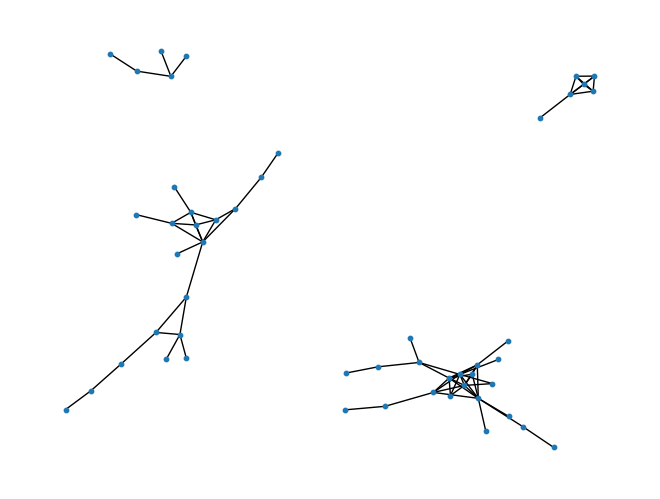

Threshold 0.68
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 7, 8, 9, 15, 48, 21}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


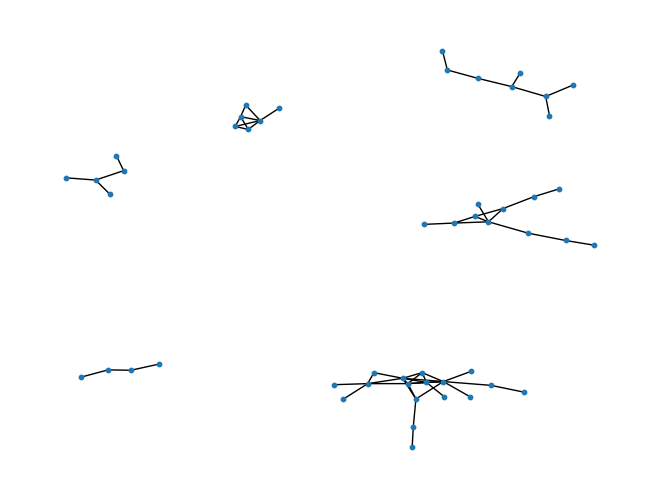

Threshold 0.7
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


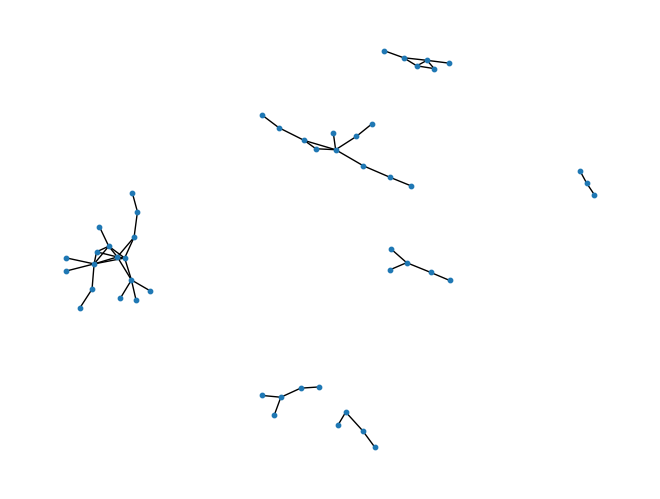

Threshold 0.72
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


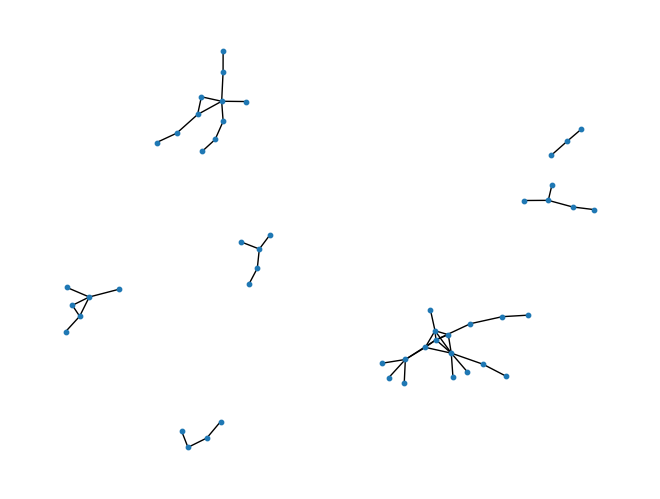

Threshold 0.74
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


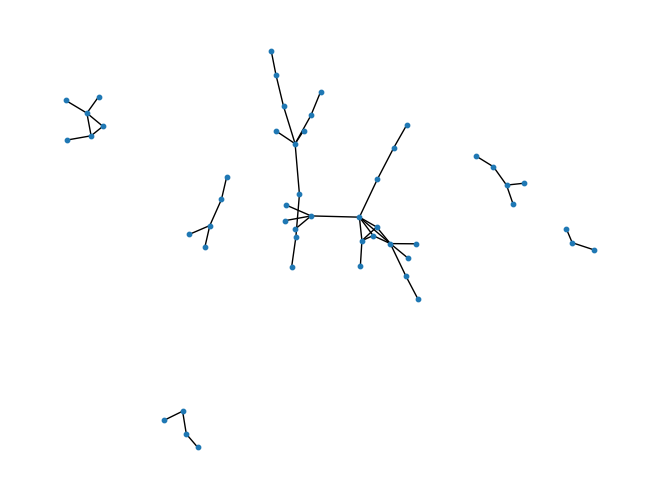

In [ ]:
interval = [x/100 for x in range(40, 75, 2)]
for threshold in interval:
    g = create_graph(threshold)
    nx.draw(g, node_size=10)
    print(f"Threshold {threshold}")
    print(f"Connected Components: {list(nx.connected_components(g))}")
    plt.show()

Threshold 0.56
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 9, 9, 10, 10, 11, 11, 11, 12, 13, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 21, 21, 23, 23, 23, 23, 25, 26, 27, 30]


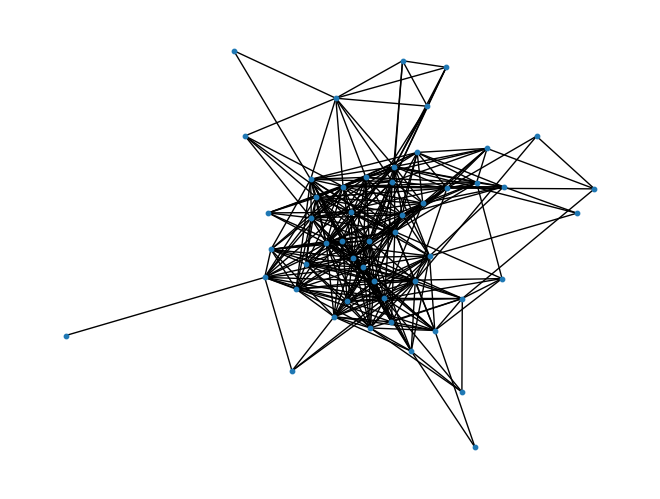

Threshold 0.5650000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 6, 9, 9, 9, 10, 10, 10, 11, 11, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 18, 19, 20, 20, 20, 21, 22, 22, 23, 24, 26, 26, 27]


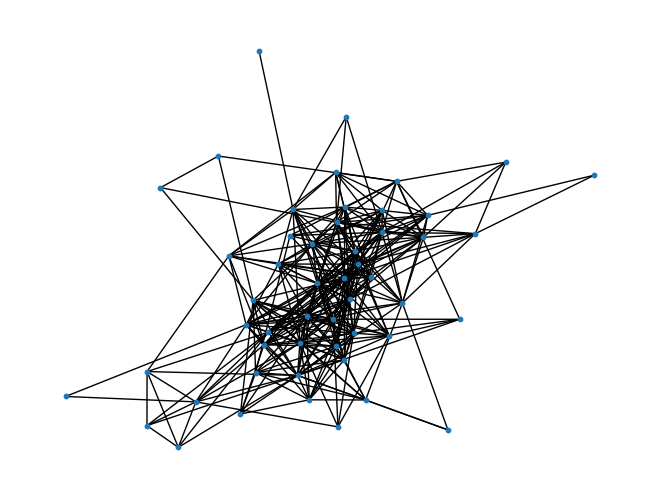

Threshold 0.5700000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 2, 2, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 9, 9, 9, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 19, 19, 19, 20, 20, 23, 25, 26, 26]


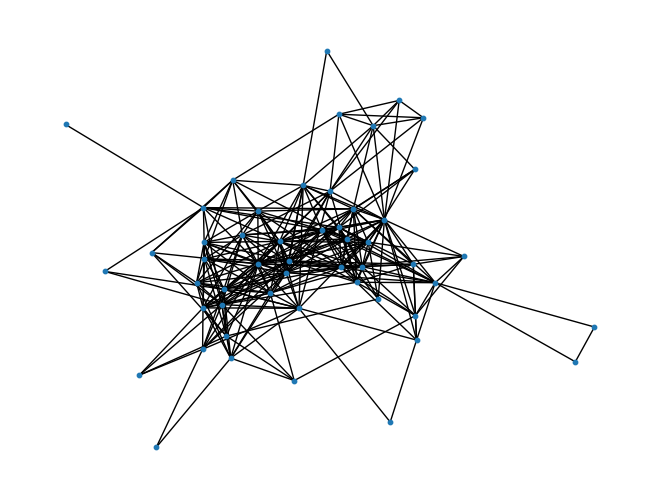

Threshold 0.5750000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15, 17, 17, 17, 17, 17, 18, 18, 19, 23, 24, 25, 25]


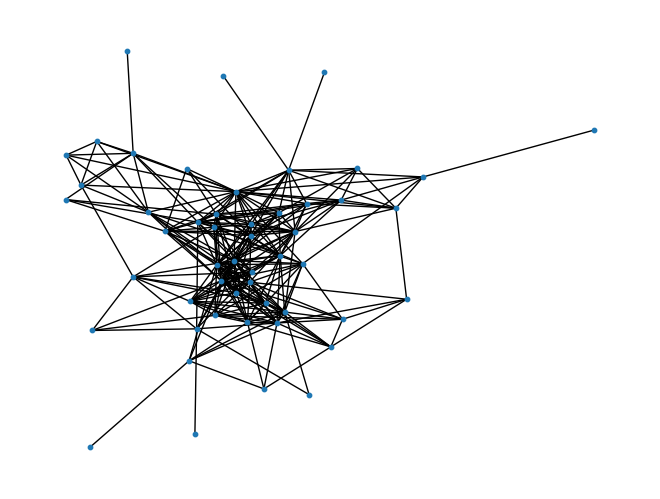

In [ ]:
interval = np.arange(0.56, 0.58, 0.005)
for threshold in interval:
    g = create_graph(threshold)
    nx.draw(g, node_size=10)
    print(f"Threshold {threshold}")
    print(f"Connected Components: {list(nx.connected_components(g))}")
    print(f"Degrees: {sorted(d for n, d in g.degree())}")
    plt.show()

Threshold 0.4
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


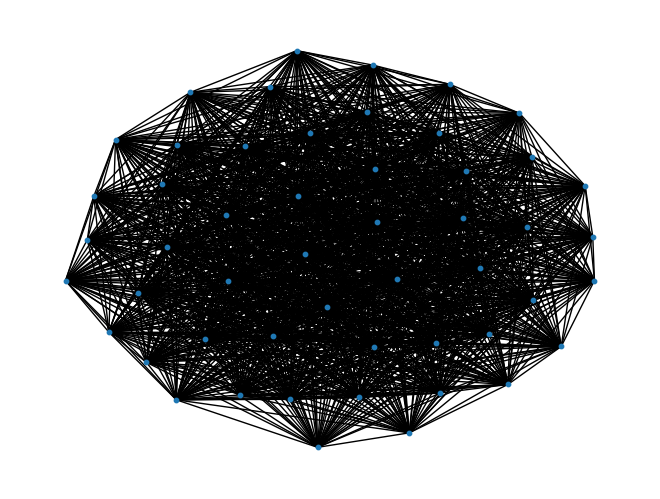

Threshold 0.42000000000000004
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


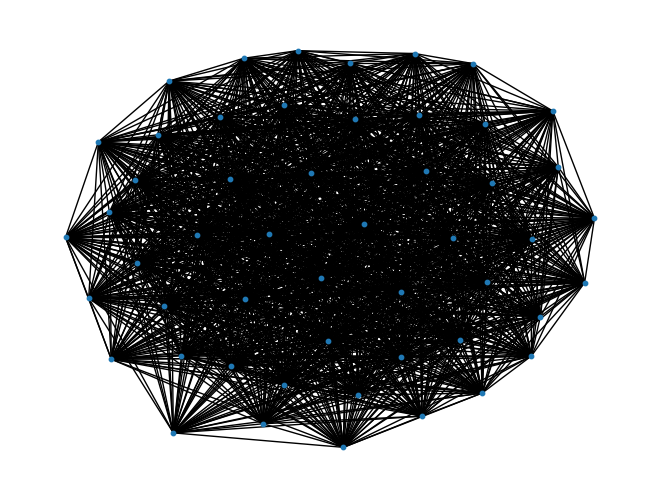

Threshold 0.44000000000000006
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


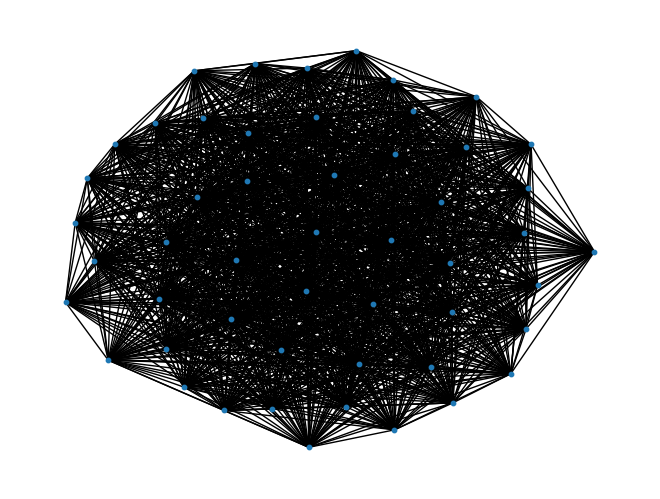

Threshold 0.4600000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


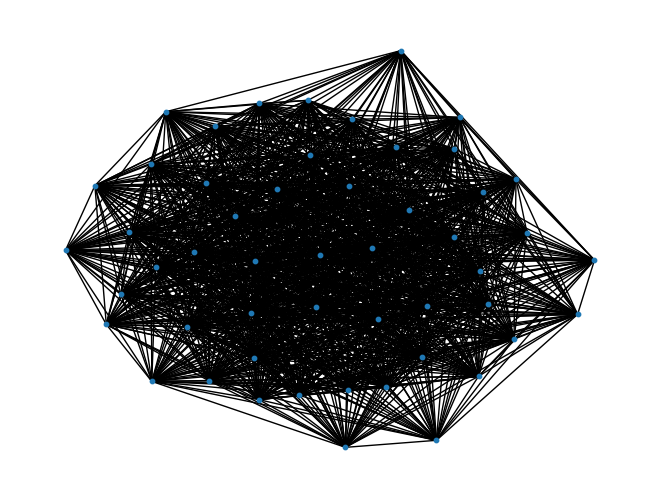

Threshold 0.4800000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


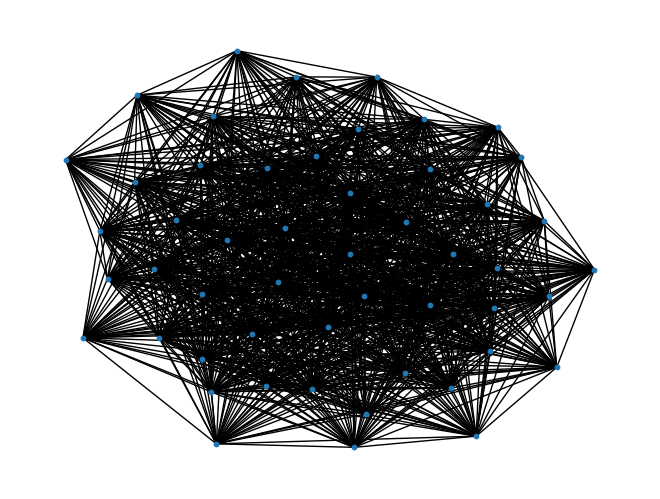

Threshold 0.5000000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


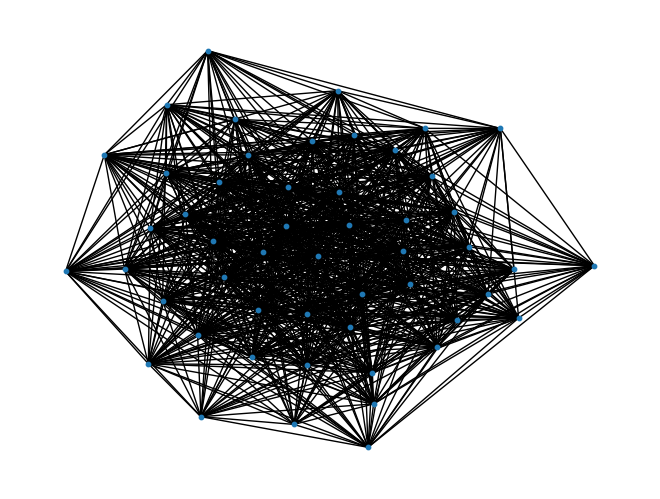

Threshold 0.5200000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


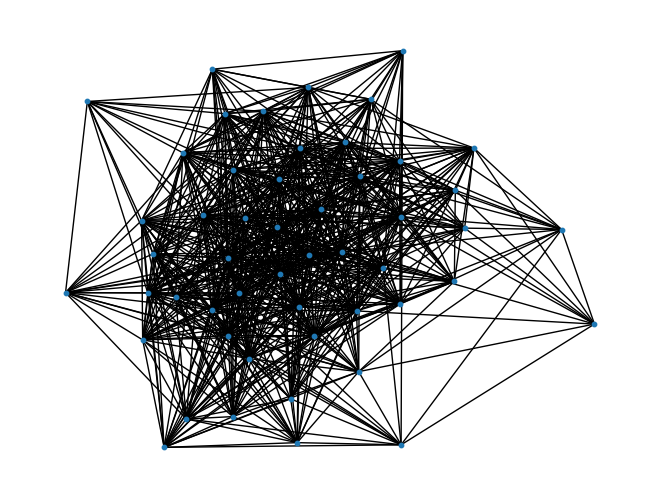

Threshold 0.5400000000000001
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


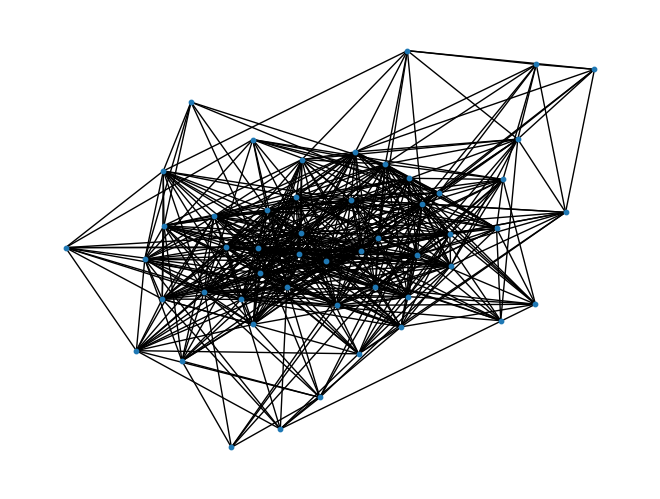

Threshold 0.5600000000000002
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


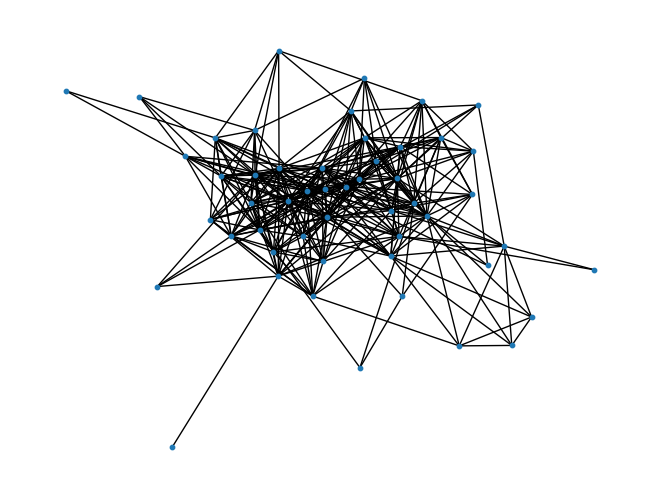

Threshold 0.5800000000000002
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


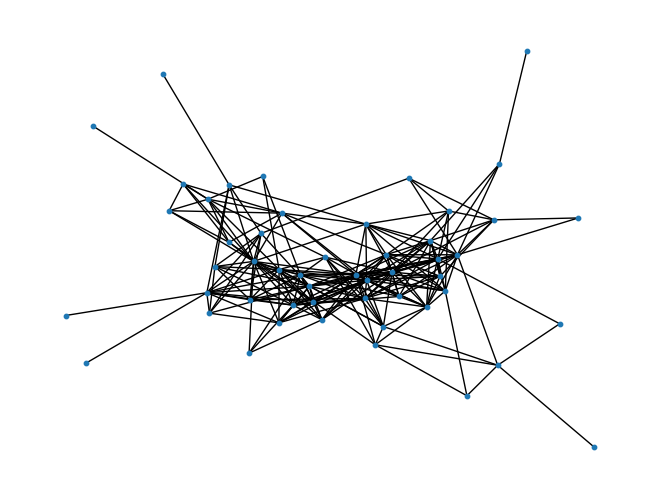

Threshold 0.6000000000000002
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


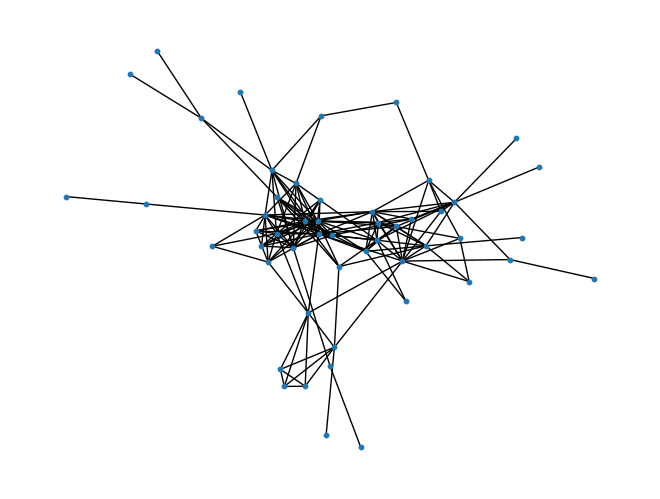

Threshold 0.6200000000000002
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]


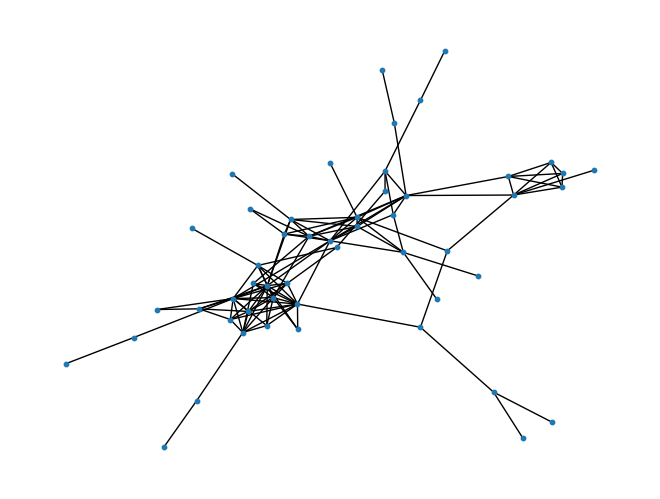

Threshold 0.6400000000000002
Connected Components: [{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50}, {2, 18, 20, 23, 29}, {33, 35, 38, 41, 42, 12}]


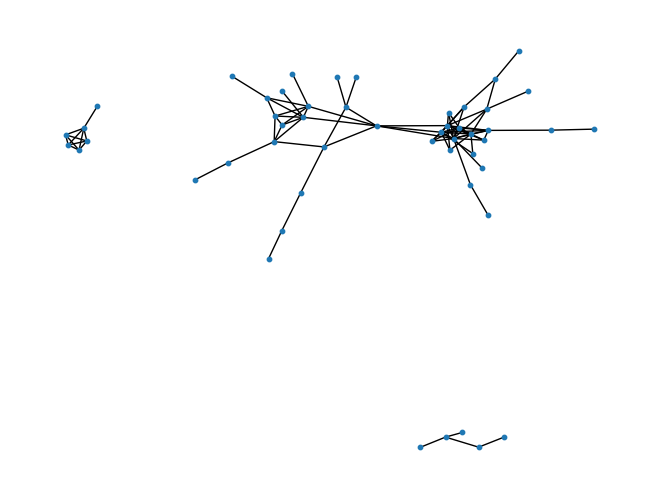

Threshold 0.6600000000000003
Connected Components: [{0, 1, 5, 6, 7, 8, 9, 13, 14, 15, 16, 19, 21, 22, 26, 40, 43, 48, 50}, {2, 18, 20, 23, 29}, {3, 4, 10, 11, 17, 24, 25, 27, 28, 30, 31, 32, 34, 36, 37, 39, 44, 45, 46, 47, 49}, {33, 35, 38, 41, 42, 12}]


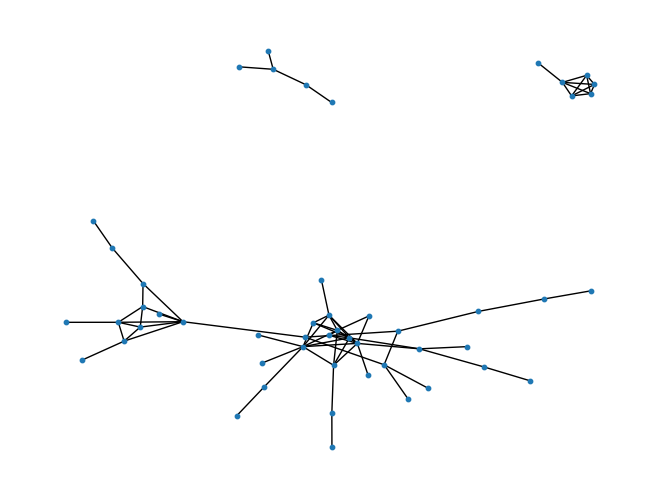

Threshold 0.6800000000000003
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 7, 8, 9, 15, 48, 21}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


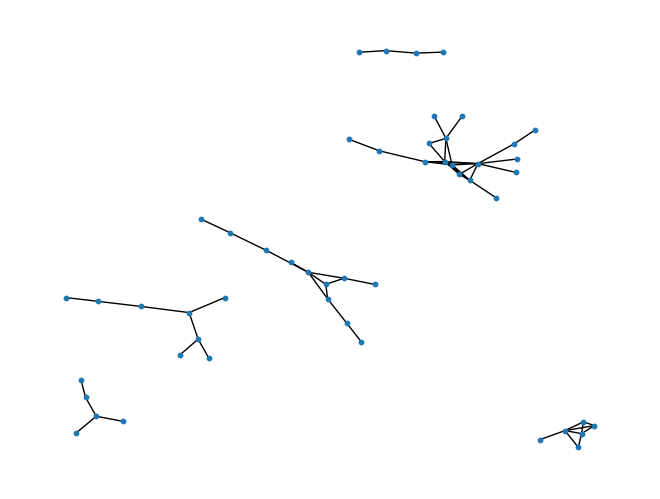

Threshold 0.7000000000000003
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


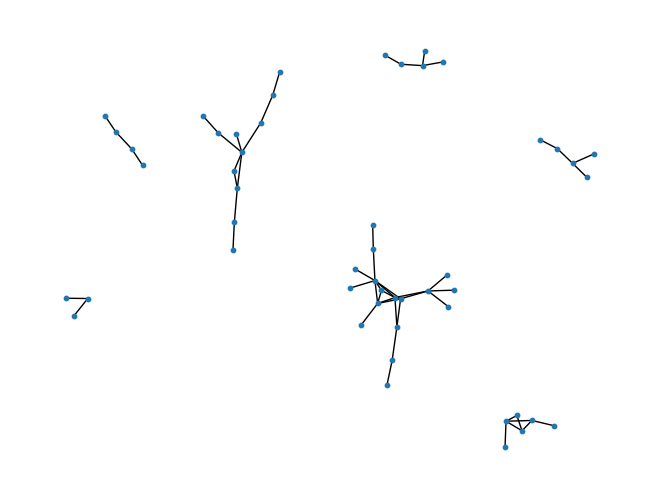

Threshold 0.7200000000000003
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


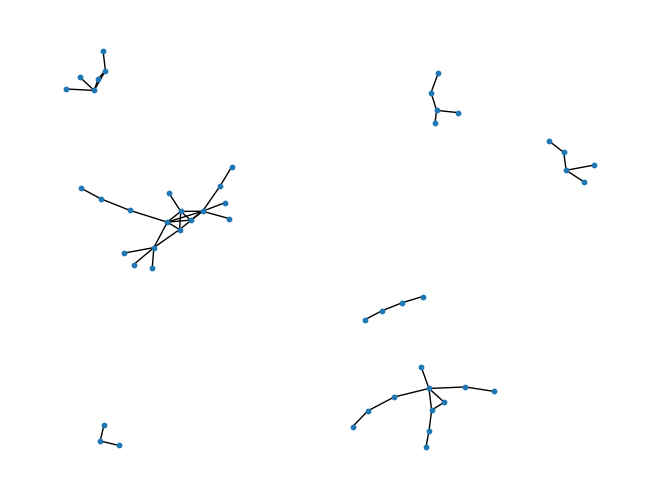

Threshold 0.7400000000000003
Connected Components: [{0, 1, 40, 43, 13, 14, 16, 50, 19, 22, 26}, {2, 18, 20, 23, 29}, {27, 17, 3, 4}, {5, 6, 9, 15, 48}, {8, 21, 7}, {32, 34, 36, 37, 39, 10, 11, 44, 45, 46, 47, 49, 24, 25, 28, 30, 31}, {33, 35, 38, 41, 42, 12}]


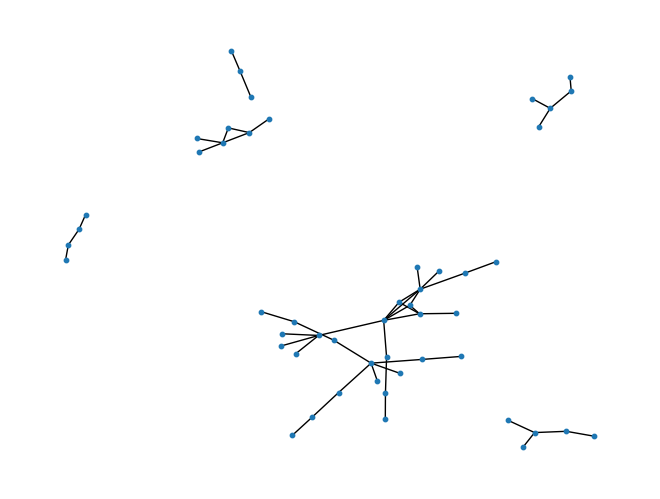

In [ ]:
interval = np.arange(0.40, 0.76, 0.02)
for threshold in interval:
    g = create_graph(threshold)
    nx.draw(g, node_size=10)
    print(f"Threshold {threshold}")
    print(f"Connected Components: {list(nx.connected_components(g))}")
    plt.show()

Threshold 0.62
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 9, 11, 12, 13, 13, 15]


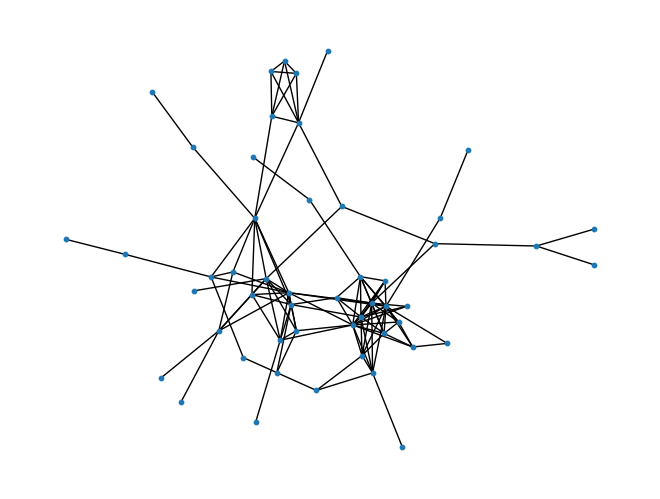

Threshold 0.625
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 11, 12, 13, 13, 14]


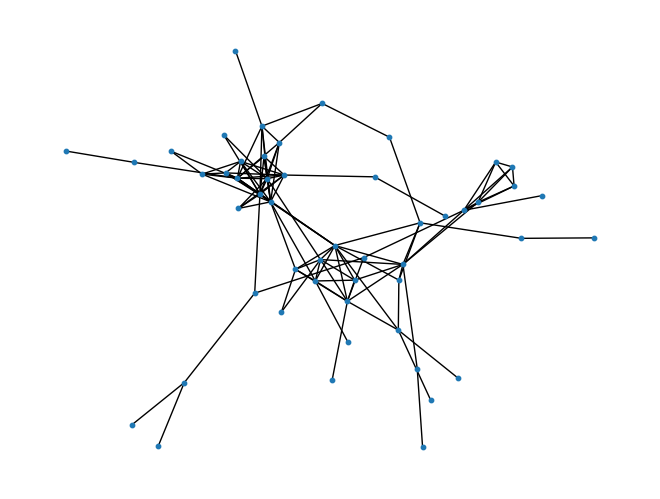

Threshold 0.63
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}]
Degrees: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 12, 12, 12, 13]


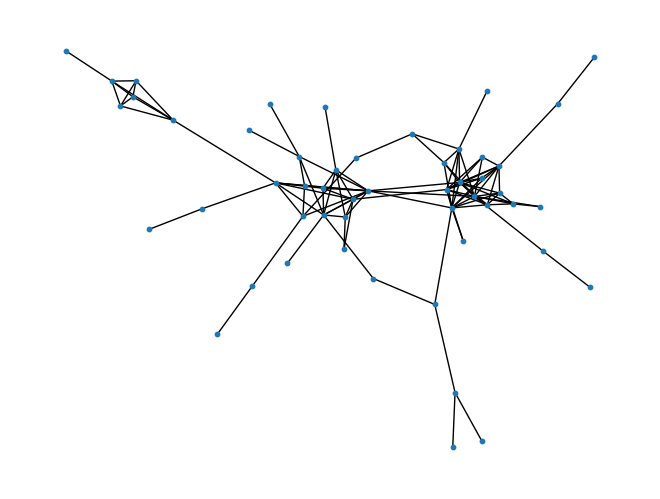

Threshold 0.635
Connected Components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50}, {33, 35, 38, 41, 42, 12}]
Degrees: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 8, 9, 10, 10, 11, 12, 13]


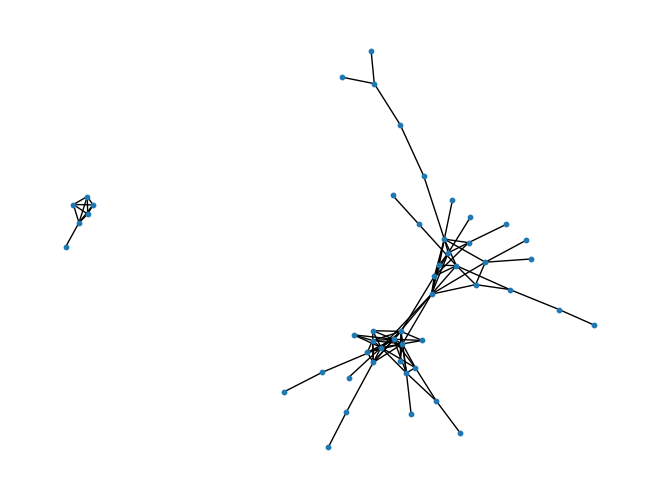

Threshold 0.64
Connected Components: [{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50}, {2, 18, 20, 23, 29}, {33, 35, 38, 41, 42, 12}]
Degrees: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 7, 9, 10, 12, 13]


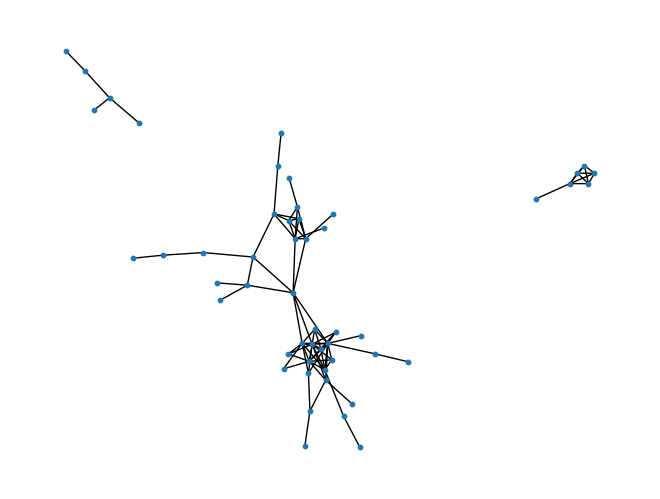

In [ ]:
interval = np.arange(0.62, 0.64, 0.005)
for threshold in interval:
    g = create_graph(threshold)
    nx.draw(g, node_size=10)
    print(f"Threshold {threshold}")
    print(f"Connected Components: {list(nx.connected_components(g))}")
    print(f"Degrees: {sorted(d for n, d in g.degree())}")
    plt.show()

Decision: Set threshold to `0.63` and create edges between isolated nodes and the most similar node. Set edge weights / attributes as the protein-protein similarity value.

Why: To create a sparse graph :^)

# Dataset

## Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data

class AlzheimersDataset(InMemoryDataset):
    def __init__(self, root, threshold=None, reconnect_isolated_nodes=False, transform=None, pre_transform=None, pre_filter=None, force_reload=False):
        self.threshold = threshold
        self.reconnect_isolated_nodes = reconnect_isolated_nodes

        super().__init__(root, transform, pre_transform, pre_filter, force_reload=force_reload)

        self.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ["log_transformed_ADNI_expression_data_with_covariates.csv", "protein_adjacency_matrix.csv"]

    @property
    def processed_file_names(self):
        return ['alzheimers_data.pt']

    def download(self):
        # Ideally download files to store locally
        pass

    def process_edges(self):
        # Read CSV
        df_similarity = pd.read_csv("protein_adjacency_matrix.csv")
        df_similarity = df_similarity.drop(df_similarity.columns[[0, 1]], axis=1)

        # Create adjacency matrix
        adj_matrix = df_similarity.copy().values

        # Remove edges that don't meet threshold
        if self.threshold != None:
            adj_matrix[adj_matrix < self.threshold] = 0

        # Find isolated nodes
        if self.reconnect_isolated_nodes:
            np.fill_diagonal(df_similarity.values, 0)
            ser_isolated = (df_similarity < 0.63).all(1)

            # Connect isolated nodes to their most similar node
            for v in ser_isolated[ser_isolated].index:
                most_similar_node = df_similarity.loc[v].argmax()
                adj_matrix[v, most_similar_node] = df_similarity.values[v, most_similar_node]
                adj_matrix[most_similar_node, v] = df_similarity.values[v, most_similar_node]

        edge_index, edge_attr = torch_geometric.utils.dense_to_sparse(torch.tensor(adj_matrix))

        # edge_attr = torch.reshape(edge_attr, (-1, 1)).type(torch.FloatTensor)
        edge_attr = edge_attr.type(torch.FloatTensor)

        return edge_index, edge_attr

    def process_graphs(self, edge_index, edge_attr):
        # Import data
        df = pd.read_csv("log_transformed_ADNI_expression_data_with_covariates.csv")

        # Remove non-relevant columns
        columns_to_remove = ['Unnamed: 0', 'Unnamed: 0.1','RID', 'Visit_Code', 'RBM.Sample.ID',
                            'Sample_Received_Date', 'SITEID', 'VISCODE', 'VISCODE2',
                            'USERDATE', 'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN', 'DIAGNOSIS',
                            'Dx_plasma_tDiff', 'USERDATE_demos', 'PTSOURCE', 'PTGENDER', 'PTDOBMM',
                            'PTDOBYY', 'PTHAND', 'PTMARRY', 'PTEDUCAT', 'plasma_demos_tDiff', 'DOB', 'ages']
        df = df.drop(columns=columns_to_remove)

        # Normalize column-wise
        df_expression = df.drop(columns=["final_diagnosis"])
        # df_expression = (df_expression-df_expression.min())/(df_expression.max()-df_expression.min()) # Min-Max Scaling
        df_expression=(df_expression-df_expression.mean())/df_expression.std() # Gaussian Normalisation

        # Convert expression data to tensor
        expression_data = torch.tensor(df_expression.values.astype(np.float32).reshape(565, 51, 1))

        # classes = ["HC", "MCI", "AD"]
        # classes_idx = np.arange(len(classes))

        # # Encode labels as ints
        # labels = torch.tensor(LabelEncoder().fit_transform(df.values[:, 0]))

        # Modify labels for binary classification of AD
        labels = torch.tensor(df.values[:, 0] == "AD").type(torch.LongTensor)

        # Create graph for each entry
        data = [Data(x=expression_data[i], y=labels[i], edge_index=edge_index, edge_attr=edge_attr) for i in range(expression_data.shape[0])]

        return data

    def process(self):
        # Processing raw files
        # Edges (fixed for every graph)
        edge_index, edge_attr = self.process_edges()

        # Per-graph Nodes
        data_list = self.process_graphs(edge_index, edge_attr)

        # __init__-defined preprocessing steps
        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        # Save data to external file
        self.save(data_list, self.processed_paths[0])

## Stratified K-Fold Cross Validation

Yoinked from [example in Pytorch Geometric](https://github.com/pyg-team/pytorch_geometric/blob/master/benchmark/kernel/train_eval.py#L98-L113)

In [ ]:
from sklearn.model_selection import StratifiedKFold
def k_fold(dataset, folds):
    skf = StratifiedKFold(folds, shuffle=True)

    train_indices, val_indices = [], []
    for _, idx in skf.split(torch.zeros(len(dataset)), dataset._data.y):
        val_indices.append(torch.from_numpy(idx).to(torch.long))

    for i in range(folds):
        train_mask = torch.ones(len(dataset), dtype=torch.bool)
        train_mask[val_indices[i]] = 0
        train_indices.append(train_mask.nonzero(as_tuple=False).view(-1))

    # return train_indices, val_indices
    for i in range(folds):
        yield i, dataset[train_indices[i]], dataset[val_indices[i]]

## Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,recall_score

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "ROC AUC": roc_auc_score,
    "Recall":recall_score,
    "Confusion Matrix": confusion_matrix,
}

def evaluate_predictions(y_true, y_pred):
    results = {}
    for name, metric in metrics.items():
        result = metric(y_true, y_pred)
        results[name] = result
    return results

def print_evals(results):
    for name, result in results.items():
        if (type(result) == np.float64):
            print(f"{name}: {result:.2f}")
        else:
            print(f"{name}:\n{result}")

## Setup

In [ ]:
import torch_geometric.transforms as T
from sklearn.model_selection import train_test_split

# Cache dataset transforms prior to saving externally
pre_transform = T.Compose([T.AddLaplacianEigenvectorPE(3, attr_name=None, is_undirected=True)])

# Enable GPU acceleration if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = T.Compose([T.ToDevice(device)])

# Create dataset
dataset = AlzheimersDataset(root="data/Alzheimers", threshold=0.63, reconnect_isolated_nodes=True, pre_transform=pre_transform, transform=transform, force_reload=True)

train_idx, test_idx = train_test_split(
    np.arange(dataset.len()),
    stratify=dataset._data.y,
    test_size=0.2,
    random_state=12345
)

dataset_train = dataset.copy(train_idx)
dataset_test = dataset.copy(test_idx)

Processing...
Done!


# Baseline Models


In [ ]:
# Select only expression data for baseline models
x_train = dataset_train._data.x.reshape(dataset_train.len(), -1, 4)[:, :, 0]
y_train = dataset_train._data.y

x_test = dataset_test._data.x.reshape(dataset_test.len(), -1, 4)[:, :, 0]
y_test = dataset_test._data.y

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,  # None means use all features; could be set to 'sqrt', 'log2', or an int
    random_state=40
)

# Train the model
dt_model.fit(x_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(x_test)

# Evaluate the model
print_evals(evaluate_predictions(y_test, dt_predictions))

Accuracy: 0.82
F1 Score: 0.37
ROC AUC: 0.61
Recall: 0.27
Confusion Matrix:
[[87  4]
 [16  6]]


## SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier with a radial basis function kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=40)

# Train the model
svm_model.fit(x_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(x_test)

# Evaluate the model
print_evals(evaluate_predictions(y_test, svm_predictions))

Accuracy: 0.84
F1 Score: 0.31
ROC AUC: 0.59
Recall: 0.18
Confusion Matrix:
[[91  0]
 [18  4]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=100,  # Increased from 100 to 150
    max_depth=10,  # Added to control the complexity of each tree
    min_samples_split=4,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider at every split
    random_state=42
)

# Train the model
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
print_evals(evaluate_predictions(y_test, rf_predictions))

Accuracy: 0.83
F1 Score: 0.30
ROC AUC: 0.59
Recall: 0.18
Confusion Matrix:
[[90  1]
 [18  4]]


## Gaussian Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
num_ad = sum(y_train == 1) / y_train.size(-1)
class_priors = [1-num_ad, num_ad]
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(x_train, y_train)

# Predict on the test set
gnb_predictions = gnb_model.predict(x_test)

# Evaluate the model
print_evals(evaluate_predictions(y_test, gnb_predictions))

Accuracy: 0.78
F1 Score: 0.44
ROC AUC: 0.66
Recall: 0.45
Confusion Matrix:
[[78 13]
 [12 10]]


## Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

# The 'max_iter' parameter may need to be increased if the model doesn't converge (i.e., you get a warning about convergence).
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(x_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(x_test)

# Evaluate the model
print_evals(evaluate_predictions(y_test, lr_predictions))

Accuracy: 0.84
F1 Score: 0.53
ROC AUC: 0.69
Recall: 0.45
Confusion Matrix:
[[85  6]
 [12 10]]


## K-Nearest Neighbours Clustering

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import numpy as np

# Set up the hyperparameter grid for 'k'
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


# Use GridSearchCV to find the best hyperparameter 'k' instead of finding out manually
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(x_train, y_train)

# Get mean test scores for each 'k'
mean_test_scores = grid.cv_results_['mean_test_score']

# Perform cross-validation for each 'k' value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Use cross_validate to perform cross-validation and return the needed scoring metrics
    scores = cross_validate(knn, x_train, y_train, cv=5,
    return_train_score=False)

# Lists to store the average scores for each 'k' value
accuracy_scores = np.zeros(len(k_range))

# Dictionary to hold the best 'k' value for each metric
best_k_values = {}

# Perform cross-validation for each 'k' value
best_k = None
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # For accuracy
    a_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores[k-1] = (np.mean(a_scores))

best_k = np.argmax(accuracy_scores) + 1
print(f"Selecting K={best_k} with best validation accuracy of {accuracy_scores[best_k-1]:.2f}..\n")

# Train a KNN model with k=13
k13 = KNeighborsClassifier(n_neighbors=best_k)
k13.fit(x_train, y_train)

# Predict on the testing set with k=13
y_k13 = k13.predict(x_test)

# Evaluation metrics for the test set with k=13
print_evals(evaluate_predictions(y_test, y_k13))

Selecting K=21 with best validation accuracy of 0.82..

Accuracy: 0.81
F1 Score: 0.15
ROC AUC: 0.53
Recall: 0.09
Confusion Matrix:
[[89  2]
 [20  2]]


# GNN Models

## [GCN Model from PyTorch Geometric Docs](https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb?usp=sharing)

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.loader import DataLoader

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels, edge_features):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch, edge_attr=None):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

## A GAT Model

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GATConv, SAGPooling, global_mean_pool

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, num_edge_features=None):
        super(GAT, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GATv2Conv(dataset.num_node_features, hidden_channels, edge_dim=num_edge_features)
        # self.pool1 = SAGPooling(hidden_channels, ratio=0.75, GNN=GATConv)
        self.conv2 = GATv2Conv(hidden_channels, hidden_channels, edge_dim=num_edge_features)
        # self.pool2 = SAGPooling(hidden_channels, ratio=0.75, GNN=GATConv)
        # self.conv3 = GATv2Conv(hidden_channels, hidden_channels, edge_dim=num_edge_features)

        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch, edge_attr=None):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index, edge_attr)
        x = x.relu()

        x = self.conv2(x, edge_index, edge_attr)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

## GAT+Pooling

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GATConv, SAGPooling, global_mean_pool

class GATPooling(torch.nn.Module):
    def __init__(self, hidden_channels, num_edge_features=None):
        super(GATPooling, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GATv2Conv(dataset.num_node_features, hidden_channels, edge_dim=num_edge_features)
        self.pool1 = SAGPooling(hidden_channels, ratio=0.75, GNN=GATConv)
        self.conv2 = GATv2Conv(hidden_channels, hidden_channels, edge_dim=num_edge_features)
        self.pool2 = SAGPooling(hidden_channels, ratio=0.75, GNN=GATConv)
        self.conv3 = GATv2Conv(hidden_channels, hidden_channels, edge_dim=num_edge_features)

        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch, edge_attr=None):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index, edge_attr)
        x = x.relu()
        x, edge_index, edge_attr, batch, _, _= self.pool1(x, edge_index, edge_attr, batch)

        x = self.conv2(x, edge_index, edge_attr)
        x = x.relu()
        x, edge_index, edge_attr, batch, _, _ = self.pool2(x, edge_index, edge_attr, batch)

        x = self.conv3(x, edge_index, edge_attr)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

## Yet Another GNN Model (Deep)

In [ ]:
from torch.nn import Linear, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GCNConv, SAGPooling, global_mean_pool, DeepGCNLayer, BatchNorm, Sequential

class YAGAT(torch.nn.Module):
    def __init__(self, node_dim, num_classes, hidden_channels, num_layers, edge_dim=None):
        super(YAGAT, self).__init__()
        torch.manual_seed(12345)

        self.input_layer = Sequential("x, edge_index, edge_attr", [
            (GATv2Conv(node_dim, hidden_channels, edge_dim=edge_dim, add_self_loops=False), "x, edge_index, edge_attr -> x"),
            ReLU(inplace=True)
        ])

        hidden_layers = []
        for i in range(num_layers-1):
            # Sandwich Pooling layer between Convolutions
            hidden_layers.append(
                (SAGPooling(hidden_channels, ratio=0.75, GNN=GCNConv),
                 "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch, _, _")
            )

            # Convolution
            hidden_layers.append(
                (DeepGCNLayer(
                    GATv2Conv(hidden_channels, hidden_channels, edge_dim=edge_dim, add_self_loops=False),
                    BatchNorm(hidden_channels),
                    ReLU(inplace=True),
                ), "x, edge_index, edge_attr -> x")
            )
        hidden_layers.append(
            (lambda x, edge_index, edge_attr, batch: (x, edge_index, edge_attr, batch),
             "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch")
        )

        self.hidden_layer = Sequential("x, edge_index, edge_attr, batch", hidden_layers)

        self.output_layer = Sequential("x, batch", [
            (global_mean_pool, "x, batch -> x"), # Readout
            Dropout(p=0.2),
            Linear(hidden_channels, dataset.num_classes) # Classifier
        ])

    def forward(self, x, edge_index, batch, edge_attr=None):
        x = self.input_layer(x, edge_index, edge_attr)
        x, edge_index, edge_attr, batch = self.hidden_layer(x, edge_index, edge_attr, batch)
        x = self.output_layer(x, batch)

        return x

In [ ]:
from torch.nn import Linear, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GCNConv, SAGPooling, global_mean_pool, DeepGCNLayer, BatchNorm, Sequential

class DeepGraphSAGE(torch.nn.Module):
    def __init__(self, node_dim, num_classes, hidden_channels, num_layers, edge_dim=None):
        super(DeepGraphSAGE, self).__init__()
        torch.manual_seed(12345)

        self.input_layer = Sequential("x, edge_index, edge_attr", [
            (SAGEConv(node_dim, hidden_channels), "x, edge_index, edge_attr -> x"),
            ReLU(inplace=True)
        ])

        hidden_layers = []
        for i in range(num_layers-1):
            # Sandwich Pooling layer between Convolutions
            hidden_layers.append(
                (SAGPooling(hidden_channels, ratio=0.75, GNN=GCNConv),
                 "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch, _, _")
            )

            # Convolution
            hidden_layers.append(
                (DeepGCNLayer(
                    SAGEConv(hidden_channels, hidden_channels),
                    BatchNorm(hidden_channels),
                    ReLU(inplace=True),
                ), "x, edge_index, edge_attr -> x")
            )
        hidden_layers.append(
            (lambda x, edge_index, edge_attr, batch: (x, edge_index, edge_attr, batch),
             "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch")
        )

        self.hidden_layer = Sequential("x, edge_index, edge_attr, batch", hidden_layers)

        self.output_layer = Sequential("x, batch", [
            (global_mean_pool, "x, batch -> x"), # Readout
            Dropout(p=0.2),
            Linear(hidden_channels, dataset.num_classes) # Classifier
        ])

    def forward(self, x, edge_index, batch, edge_attr=None):
        x = self.input_layer(x, edge_index, edge_attr)
        x, edge_index, edge_attr, batch = self.hidden_layer(x, edge_index, edge_attr, batch)
        x = self.output_layer(x, batch)

        return x

## Graphsage


### Simple

In [ ]:
from torch_geometric.nn import SAGEConv, Sequential
from torch_geometric.data import Data
# define graphSAGE Model....
class GraphSAGE(torch.nn.Module):
    def __init__(self,hidden_channels,num_edge_features=None):
      super(GraphSAGE,self).__init__()
      self.conv1 = SAGEConv(dataset.num_node_features,hidden_channels)
      self.conv2 = SAGEConv(hidden_channels,hidden_channels)

      self.lin = Linear(hidden_channels, dataset.num_classes)



    def forward(self, x, edge_index, batch=None, edge_attr=None):
      # now I am going to update here for the purpose of forwarding....
      x = self.conv1(x,edge_index)
      # now I am implementing activation function...
      x = torch.relu(x)
      # now same convolution...
      x = self.conv2(x,edge_index)

      # 2. Readout layer
      x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

      # 3. Apply a final classifier
      x = F.dropout(x, p=0.5, training=self.training)
      x = self.lin(x)
      return x

### Pooled

In [ ]:
from torch.nn import Linear,Flatten
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GATConv, SAGPooling, global_mean_pool

class GraphSAGEPooling(torch.nn.Module):
    def __init__(self, hidden_channels, num_edge_features=None):
        super(GraphSAGEPooling, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = SAGEConv(dataset.num_node_features, hidden_channels)
        self.pool1 = SAGPooling(hidden_channels, ratio=0.75, GNN=SAGEConv)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.pool2 = SAGPooling(hidden_channels, ratio=0.75, GNN=SAGEConv)
        self.conv3 = SAGEConv(hidden_channels, hidden_channels)

        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index,batch=None,size=None, edge_attr=None):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index, edge_attr)
        x = torch.relu(x)
        x, edge_index, edge_attr, batch, _, _= self.pool1(x, edge_index, edge_attr, batch)

        x = self.conv2(x, edge_index, edge_attr)
        x = x.relu()
        x, edge_index, edge_attr, batch, _, _ = self.pool2(x, edge_index, edge_attr, batch)

        x = self.conv3(x, edge_index, edge_attr)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        # x = torch.Flatten(x)
        x = self.lin(x)

        return F.log_softmax(x,dim=1)

### Deep

In [ ]:
# This is for developing Deep GraphSAGE ....
from torch.nn import Linear, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GCNConv, SAGPooling, global_mean_pool, DeepGCNLayer, BatchNorm, Sequential

class DeepGraphSAGE(torch.nn.Module):
    def __init__(self, node_dim, num_classes, hidden_channels, num_layers, edge_dim):
        super(DeepGraphSAGE, self).__init__()
        torch.manual_seed(12345)

        self.input_layer = Sequential("x, edge_index", [
            (SAGEConv(node_dim, hidden_channels), "x, edge_index -> x"),
            ReLU(inplace=True)
        ])

        hidden_layers = []
        for i in range(num_layers-1):
            # Sandwich Pooling layer between Convolutions
            hidden_layers.append(
                (SAGPooling(hidden_channels, ratio=0.75, GNN=SAGEConv),
                 "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch, _, _")
            )

            # Convolution
            hidden_layers.append(
                (DeepGCNLayer(
                    SAGEConv(hidden_channels, hidden_channels),
                    BatchNorm(hidden_channels),
                    ReLU(inplace=True),
                ), "x, edge_index -> x")
            )
        hidden_layers.append(
            (lambda x, edge_index, edge_attr, batch: (x, edge_index, edge_attr, batch),
             "x, edge_index, edge_attr, batch -> x, edge_index, edge_attr, batch")
        )

        self.hidden_layer = Sequential("x, edge_index, edge_attr, batch", hidden_layers)

        self.output_layer = Sequential("x, batch", [
            (global_mean_pool, "x, batch -> x"), # Readout
            Dropout(p=0.2),
            Linear(hidden_channels, dataset.num_classes) # Classifier
        ])

    def forward(self, x, edge_index, batch, edge_attr=None):
        x = self.input_layer(x, edge_index)
        x, edge_index, edge_attr, batch = self.hidden_layer(x, edge_index, edge_attr, batch)
        x = self.output_layer(x, batch)

        return x

# Training and Evaluation

In [ ]:
def train(model, loader, clip_gradients=None):
    model.train()

    for data in loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch, data.edge_attr)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         if clip_gradients != None:
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_gradients) # Clip loss gradient to limit effect of loss exploding
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(model, loader, metrics={}):
    model.eval()

    loss = 0
    num_data = 0
    for data in loader:  # Iterate in batches over the given dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_attr)
        loss += criterion(out, data.y)*data.batch_size
        num_data += data.batch_size

    loss /= num_data
    return loss

def evaluate(model, loader):
    model.eval()

    y_true = []
    y_pred = []

    num_data = 0
    for data in loader:  # Iterate in batches over the given dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_attr)
        y_true.extend((data.y).to("cpu")) # Ground-truth labels
        y_pred.extend((out.argmax(dim=1)).to("cpu")) # Use the class with highest probability.

    return evaluate_predictions(y_true, y_pred)

In [ ]:
def trainGraphsage(model, loader, clip_gradients=None):
    model.train()

    for data in loader:  # Iterate in batches over the training dataset.
         x=data.x.contiguous().view(-1, 4*51)
         print(data.edge_index.shape)

         edge_index= Flatten()

         out = model(x, data.edge_index, data.batch, data.edge_attr)  # Perform a single forward pass.
         optimizer.zero_grad()
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         if clip_gradients != None:
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_gradients) # Clip loss gradient to limit effect of loss exploding
         optimizer.step()  # Update parameters based on gradients.
         # optimizer.zero_grad()  # Clear gradients.
         total_loss += loss.item() * data.num_graphs
         return total_loss/len(loader.dataset)


def test(model, loader, metrics={}):
    model.eval()

    loss = 0
    num_data = 0
    for data in loader:  # Iterate in batches over the given dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_attr)
        loss += criterion(out, data.y)*data.batch_size
        num_data += data.batch_size

    loss /= num_data
    return loss

def evaluate(model, loader):
    model.eval()

    y_true = []
    y_pred = []

    num_data = 0
    for data in loader:  # Iterate in batches over the given dataset.
        out = model(data.x, data.edge_index, data.batch, data.edge_attr)
        y_true.extend((data.y).to("cpu")) # Ground-truth labels
        y_pred.extend((out.argmax(dim=1)).to("cpu")) # Use the class with highest probability.

    return evaluate_predictions(y_true, y_pred)

## Early Stopping
[Lifted from StackOverflow](https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch)

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False


## Running the Code

### Simple GAT

Fold 0
Epoch: 010, Loss (Train): 0.49045559763908386, Loss (Validation): 0.4912303686141968
Epoch: 020, Loss (Train): 0.474376916885376, Loss (Validation): 0.4835270643234253
Epoch: 030, Loss (Train): 0.4707815647125244, Loss (Validation): 0.48623126745224
Epoch: 040, Loss (Train): 0.4698932468891144, Loss (Validation): 0.4893733561038971
Epoch: 050, Loss (Train): 0.4690208435058594, Loss (Validation): 0.4897182583808899
Epoch: 060, Loss (Train): 0.4684617221355438, Loss (Validation): 0.4899410009384155
Epoch: 070, Loss (Train): 0.4680611789226532, Loss (Validation): 0.49161040782928467
Stopped early at epoch 70
Evaluating on Validation set, Fold 0
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


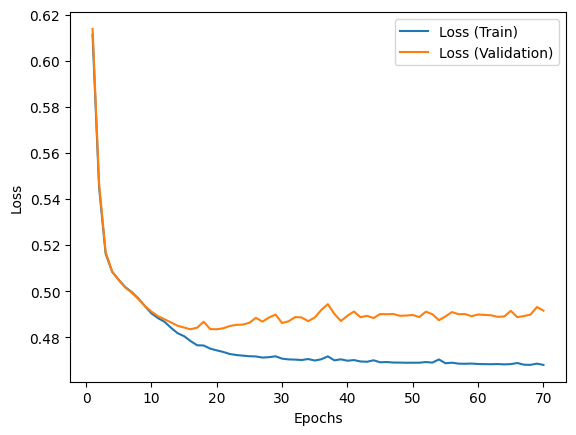


Fold 1
Epoch: 010, Loss (Train): 0.4915071725845337, Loss (Validation): 0.4909140467643738
Epoch: 020, Loss (Train): 0.4771951138973236, Loss (Validation): 0.47960713505744934
Epoch: 030, Loss (Train): 0.47300660610198975, Loss (Validation): 0.47545188665390015
Epoch: 040, Loss (Train): 0.47260624170303345, Loss (Validation): 0.47547587752342224
Epoch: 050, Loss (Train): 0.47150537371635437, Loss (Validation): 0.47562944889068604
Epoch: 060, Loss (Train): 0.47099804878234863, Loss (Validation): 0.4757368564605713
Epoch: 070, Loss (Train): 0.4704363942146301, Loss (Validation): 0.47563180327415466
Epoch: 080, Loss (Train): 0.4701367914676666, Loss (Validation): 0.4754287004470825
Epoch: 090, Loss (Train): 0.47003379464149475, Loss (Validation): 0.4750417172908783
Epoch: 100, Loss (Train): 0.46904072165489197, Loss (Validation): 0.47575443983078003
Epoch: 110, Loss (Train): 0.4685156047344208, Loss (Validation): 0.4761279225349426
Epoch: 120, Loss (Train): 0.4680745303630829, Loss (Vali

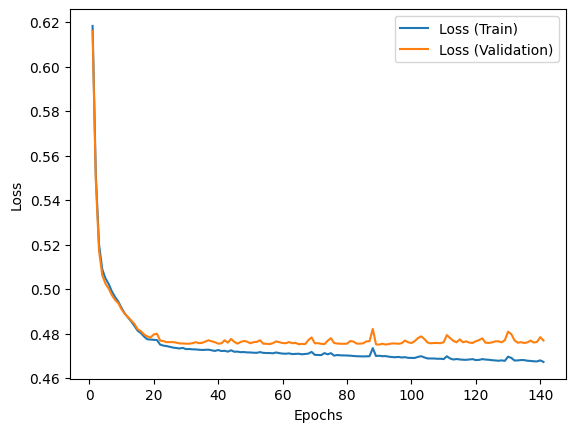


Fold 2
Epoch: 010, Loss (Train): 0.4884011447429657, Loss (Validation): 0.4964469075202942
Epoch: 020, Loss (Train): 0.4709046185016632, Loss (Validation): 0.49727845191955566
Epoch: 030, Loss (Train): 0.465738981962204, Loss (Validation): 0.5055267214775085
Epoch: 040, Loss (Train): 0.46437883377075195, Loss (Validation): 0.5047891736030579
Epoch: 050, Loss (Train): 0.46346208453178406, Loss (Validation): 0.507242739200592
Epoch: 060, Loss (Train): 0.4624103307723999, Loss (Validation): 0.5065516233444214
Stopped early at epoch 65
Evaluating on Validation set, Fold 2
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


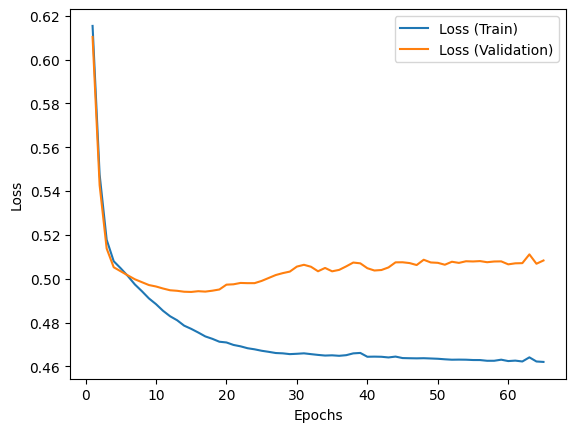


Fold 3
Epoch: 010, Loss (Train): 0.4938257336616516, Loss (Validation): 0.4926108121871948
Epoch: 020, Loss (Train): 0.4781186580657959, Loss (Validation): 0.47253352403640747
Epoch: 030, Loss (Train): 0.47549667954444885, Loss (Validation): 0.4676011800765991
Epoch: 040, Loss (Train): 0.47380274534225464, Loss (Validation): 0.4681531488895416
Epoch: 050, Loss (Train): 0.4726828932762146, Loss (Validation): 0.46773889660835266
Epoch: 060, Loss (Train): 0.47203367948532104, Loss (Validation): 0.471476674079895
Epoch: 070, Loss (Train): 0.47060856223106384, Loss (Validation): 0.4702377915382385
Epoch: 080, Loss (Train): 0.470618337392807, Loss (Validation): 0.4701414108276367
Epoch: 090, Loss (Train): 0.4685806632041931, Loss (Validation): 0.4735319912433624
Stopped early at epoch 99
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


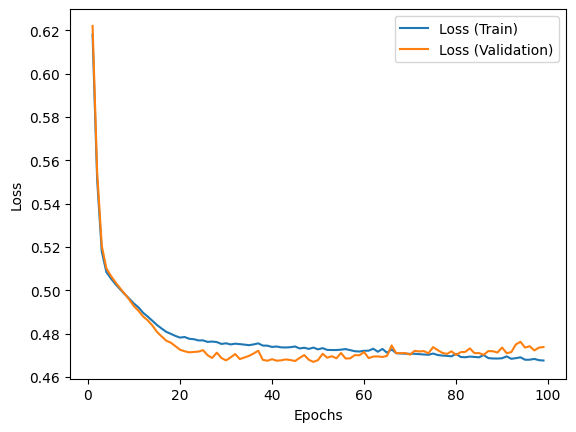


Fold 4
Epoch: 010, Loss (Train): 0.49300113320350647, Loss (Validation): 0.48996269702911377
Epoch: 020, Loss (Train): 0.4828174114227295, Loss (Validation): 0.46911898255348206
Epoch: 030, Loss (Train): 0.47959816455841064, Loss (Validation): 0.45798543095588684
Epoch: 040, Loss (Train): 0.4781443178653717, Loss (Validation): 0.45338886976242065
Epoch: 050, Loss (Train): 0.4775414764881134, Loss (Validation): 0.45441603660583496
Epoch: 060, Loss (Train): 0.4770042300224304, Loss (Validation): 0.4541284739971161
Epoch: 070, Loss (Train): 0.47760137915611267, Loss (Validation): 0.45611485838890076
Epoch: 080, Loss (Train): 0.4761855900287628, Loss (Validation): 0.45567643642425537
Epoch: 090, Loss (Train): 0.47530460357666016, Loss (Validation): 0.450921893119812
Epoch: 100, Loss (Train): 0.4757676422595978, Loss (Validation): 0.45566847920417786
Epoch: 110, Loss (Train): 0.4740932583808899, Loss (Validation): 0.451891154050827
Epoch: 120, Loss (Train): 0.47356361150741577, Loss (Valid

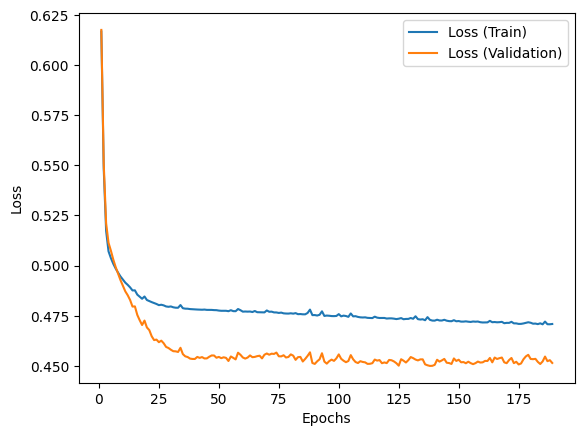

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "GAT"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [GAT(hidden_channels=32, num_edge_features=1) for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)

    # Try to keep model with lowest loss
    best_fold_loss = 1

    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model, f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    models[i] = torch.load(f"{model_type}-BEST-{i}.pt")
    model = models[i]
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:
    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = torch.load(f"{model_type}-BEST-{best_fold}.pt")
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 4, with Loss 0.450):
-----
Accuracy: 0.81
F1 Score: 0.09
ROC AUC: 0.52
Recall: 0.05
Confusion Matrix:
[[91  0]
 [21  1]]

Mean:
-----
Accuracy: 0.81
F1 Score: 0.05
ROC AUC: 0.51
Recall: 0.03
Confusion Matrix:
[[91.   0. ]
 [21.4  0.6]]

STD:
-----
Accuracy: 0.00
F1 Score: 0.04
ROC AUC: 0.01
Recall: 0.02
Confusion Matrix:
[[0.         0.        ]
 [0.48989795 0.48989795]]


### GAT+Pooling

Fold 0
Epoch: 010, Loss (Train): 0.48681554198265076, Loss (Validation): 0.4872223734855652
Epoch: 020, Loss (Train): 0.4845646321773529, Loss (Validation): 0.48548975586891174
Epoch: 030, Loss (Train): 0.4816765785217285, Loss (Validation): 0.4852980375289917
Epoch: 040, Loss (Train): 0.4760477542877197, Loss (Validation): 0.4776895344257355
Epoch: 050, Loss (Train): 0.4729076027870178, Loss (Validation): 0.4719775915145874
Epoch: 060, Loss (Train): 0.46830540895462036, Loss (Validation): 0.4650084972381592
Epoch: 070, Loss (Train): 0.4664088785648346, Loss (Validation): 0.4644641876220703
Epoch: 080, Loss (Train): 0.463119775056839, Loss (Validation): 0.4570007920265198
Epoch: 090, Loss (Train): 0.46070584654808044, Loss (Validation): 0.451698899269104
Epoch: 100, Loss (Train): 0.45888474583625793, Loss (Validation): 0.4532458186149597
Epoch: 110, Loss (Train): 0.4566565752029419, Loss (Validation): 0.4543343484401703
Epoch: 120, Loss (Train): 0.45895346999168396, Loss (Validation): 

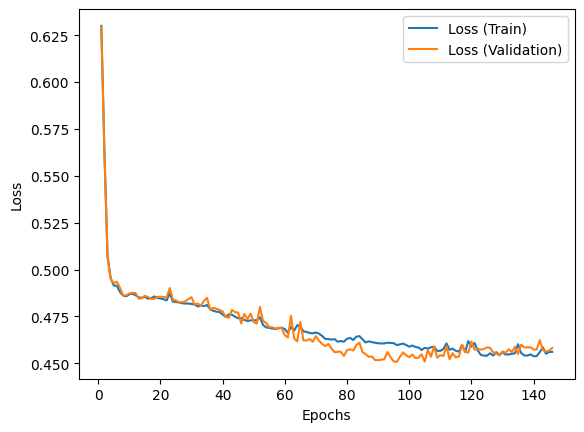


Fold 1
Epoch: 010, Loss (Train): 0.48132359981536865, Loss (Validation): 0.5011784434318542
Epoch: 020, Loss (Train): 0.4768489897251129, Loss (Validation): 0.50887131690979
Epoch: 030, Loss (Train): 0.4721953868865967, Loss (Validation): 0.509321391582489
Epoch: 040, Loss (Train): 0.46348240971565247, Loss (Validation): 0.511853039264679
Epoch: 050, Loss (Train): 0.4548772871494293, Loss (Validation): 0.5177925825119019
Stopped early at epoch 56
Evaluating on Validation set, Fold 1
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


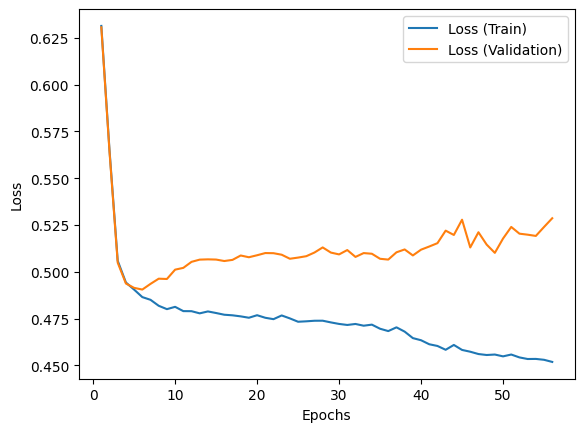


Fold 2
Epoch: 010, Loss (Train): 0.4833672344684601, Loss (Validation): 0.492952823638916
Epoch: 020, Loss (Train): 0.48115962743759155, Loss (Validation): 0.4880223274230957
Epoch: 030, Loss (Train): 0.4761122465133667, Loss (Validation): 0.48626241087913513
Epoch: 040, Loss (Train): 0.46714821457862854, Loss (Validation): 0.4800390899181366
Epoch: 050, Loss (Train): 0.4626004695892334, Loss (Validation): 0.47811755537986755
Epoch: 060, Loss (Train): 0.46044623851776123, Loss (Validation): 0.48347681760787964
Epoch: 070, Loss (Train): 0.4577934145927429, Loss (Validation): 0.49080541729927063
Epoch: 080, Loss (Train): 0.4546639919281006, Loss (Validation): 0.4908076822757721
Epoch: 090, Loss (Train): 0.449572890996933, Loss (Validation): 0.5020185708999634
Stopped early at epoch 97
Evaluating on Validation set, Fold 2
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


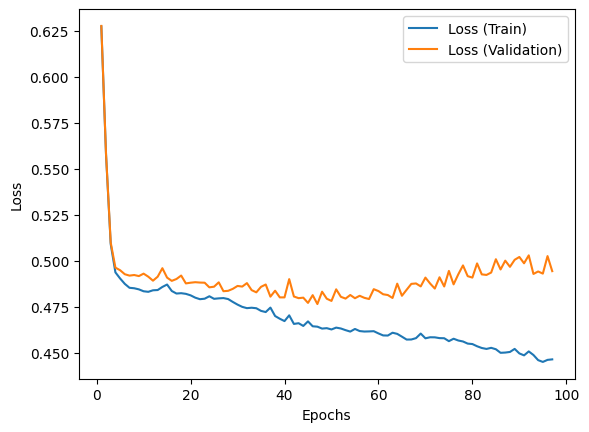


Fold 3
Epoch: 010, Loss (Train): 0.4832383990287781, Loss (Validation): 0.4851738512516022
Epoch: 020, Loss (Train): 0.47973376512527466, Loss (Validation): 0.47929757833480835
Epoch: 030, Loss (Train): 0.4762510061264038, Loss (Validation): 0.4806075394153595
Epoch: 040, Loss (Train): 0.470069020986557, Loss (Validation): 0.482424259185791
Epoch: 050, Loss (Train): 0.46656936407089233, Loss (Validation): 0.47987663745880127
Epoch: 060, Loss (Train): 0.4634968340396881, Loss (Validation): 0.48185238242149353
Stopped early at epoch 65
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


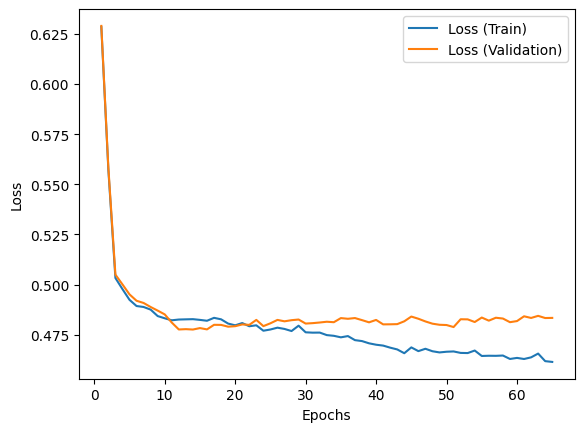


Fold 4
Epoch: 010, Loss (Train): 0.49085119366645813, Loss (Validation): 0.4768575429916382
Epoch: 020, Loss (Train): 0.48894575238227844, Loss (Validation): 0.46762987971305847
Epoch: 030, Loss (Train): 0.48640549182891846, Loss (Validation): 0.4658963084220886
Epoch: 040, Loss (Train): 0.4836398959159851, Loss (Validation): 0.4575863480567932
Epoch: 050, Loss (Train): 0.47985604405403137, Loss (Validation): 0.450333833694458
Epoch: 060, Loss (Train): 0.4768213629722595, Loss (Validation): 0.43830406665802
Epoch: 070, Loss (Train): 0.4705469310283661, Loss (Validation): 0.43224138021469116
Epoch: 080, Loss (Train): 0.4679133892059326, Loss (Validation): 0.4271370768547058
Epoch: 090, Loss (Train): 0.46510714292526245, Loss (Validation): 0.4377807378768921
Epoch: 100, Loss (Train): 0.4645877480506897, Loss (Validation): 0.44807514548301697
Epoch: 110, Loss (Train): 0.4829995334148407, Loss (Validation): 0.4735075831413269
Epoch: 120, Loss (Train): 0.4758184254169464, Loss (Validation)

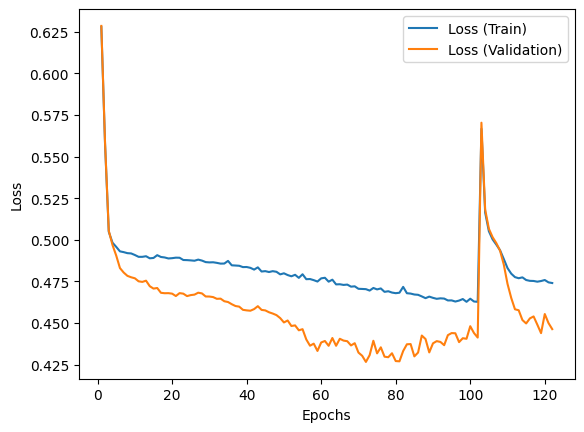

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "GAT+Pooling"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [GATPooling(hidden_channels=32, num_edge_features=1) for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)

    # Try to keep model with lowest loss
    best_fold_loss = 1

    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model, f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    models[i] = torch.load(f"{model_type}-BEST-{i}.pt")
    model = models[i]
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:
    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = torch.load(f"{model_type}-BEST-{best_fold}.pt")
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 4, with Loss 0.427):
-----
Accuracy: 0.79
F1 Score: 0.08
ROC AUC: 0.51
Recall: 0.05
Confusion Matrix:
[[88  3]
 [21  1]]

Mean:
-----
Accuracy: 0.80
F1 Score: 0.03
ROC AUC: 0.50
Recall: 0.02
Confusion Matrix:
[[89.8  1.2]
 [21.6  0.4]]

STD:
-----
Accuracy: 0.01
F1 Score: 0.04
ROC AUC: 0.01
Recall: 0.02
Confusion Matrix:
[[1.16619038 1.16619038]
 [0.48989795 0.48989795]]


### Deep GAT

Fold 0
Epoch: 010, Loss (Train): 0.466306209564209, Loss (Validation): 0.5076969861984253
Epoch: 020, Loss (Train): 0.4521002471446991, Loss (Validation): 0.5061078667640686
Epoch: 030, Loss (Train): 0.455852210521698, Loss (Validation): 0.5002831816673279
Epoch: 040, Loss (Train): 0.45232564210891724, Loss (Validation): 0.5109840631484985
Epoch: 050, Loss (Train): 0.45119786262512207, Loss (Validation): 0.49988430738449097
Epoch: 060, Loss (Train): 0.4571707248687744, Loss (Validation): 0.495743989944458
Epoch: 070, Loss (Train): 0.45946288108825684, Loss (Validation): 0.4974786639213562
Epoch: 080, Loss (Train): 0.4561607539653778, Loss (Validation): 0.4982508718967438
Epoch: 090, Loss (Train): 0.4588432312011719, Loss (Validation): 0.4961663782596588
Stopped early at epoch 98
Evaluating on Validation set, Fold 0
Accuracy: 0.82
F1 Score: 0.20
ROC AUC: 0.56
Recall: 0.11
Confusion Matrix:
[[73  0]
 [16  2]]


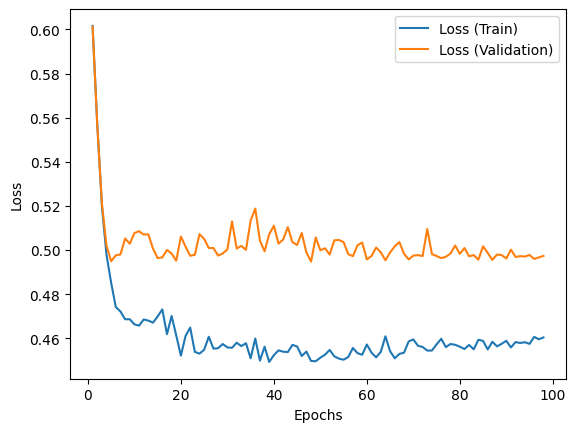


Fold 1
Epoch: 010, Loss (Train): 0.47383514046669006, Loss (Validation): 0.4739924967288971
Epoch: 020, Loss (Train): 0.47227731347084045, Loss (Validation): 0.47788769006729126
Epoch: 030, Loss (Train): 0.471477210521698, Loss (Validation): 0.4727478623390198
Epoch: 040, Loss (Train): 0.4651913046836853, Loss (Validation): 0.47032979130744934
Epoch: 050, Loss (Train): 0.46411702036857605, Loss (Validation): 0.4763543903827667
Epoch: 060, Loss (Train): 0.4648696780204773, Loss (Validation): 0.4758097231388092
Epoch: 070, Loss (Train): 0.4678322672843933, Loss (Validation): 0.4712222218513489
Epoch: 080, Loss (Train): 0.4703008830547333, Loss (Validation): 0.4712638258934021
Epoch: 090, Loss (Train): 0.48018041253089905, Loss (Validation): 0.48151952028274536
Epoch: 100, Loss (Train): 0.48376935720443726, Loss (Validation): 0.4837346076965332
Stopped early at epoch 103
Evaluating on Validation set, Fold 1
Accuracy: 0.81
F1 Score: 0.11
ROC AUC: 0.53
Recall: 0.06
Confusion Matrix:
[[73  

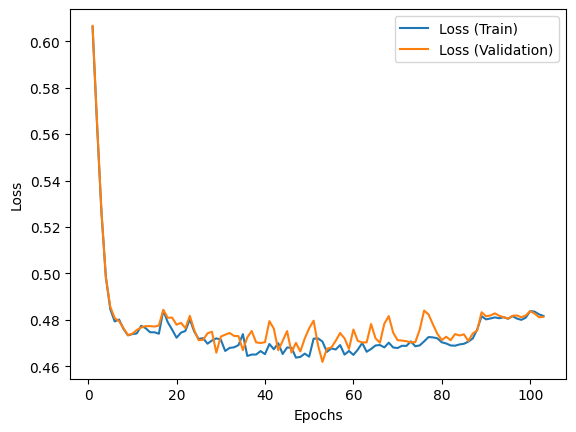


Fold 2
Epoch: 010, Loss (Train): 0.48480257391929626, Loss (Validation): 0.4753640294075012
Epoch: 020, Loss (Train): 0.47472071647644043, Loss (Validation): 0.4563096761703491
Epoch: 030, Loss (Train): 0.4715830385684967, Loss (Validation): 0.45097020268440247
Epoch: 040, Loss (Train): 0.4751327335834503, Loss (Validation): 0.44766494631767273
Epoch: 050, Loss (Train): 0.47563114762306213, Loss (Validation): 0.4482990801334381
Epoch: 060, Loss (Train): 0.47655463218688965, Loss (Validation): 0.4571218490600586
Epoch: 070, Loss (Train): 0.4738132357597351, Loss (Validation): 0.4495493173599243
Epoch: 080, Loss (Train): 0.47541216015815735, Loss (Validation): 0.45528528094291687
Epoch: 090, Loss (Train): 0.4762760102748871, Loss (Validation): 0.44944873452186584
Epoch: 100, Loss (Train): 0.4766841232776642, Loss (Validation): 0.45798417925834656
Stopped early at epoch 105
Evaluating on Validation set, Fold 2
Accuracy: 0.82
F1 Score: 0.20
ROC AUC: 0.56
Recall: 0.11
Confusion Matrix:
[[7

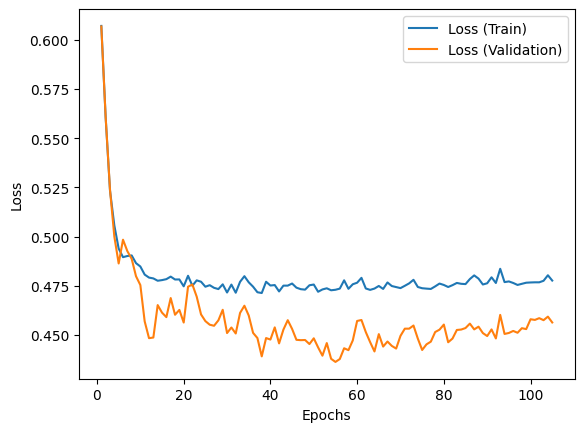


Fold 3
Epoch: 010, Loss (Train): 0.46487149596214294, Loss (Validation): 0.5083847641944885
Epoch: 020, Loss (Train): 0.4449576437473297, Loss (Validation): 0.5185885429382324
Epoch: 030, Loss (Train): 0.4649970233440399, Loss (Validation): 0.5182685852050781
Epoch: 040, Loss (Train): 0.45155003666877747, Loss (Validation): 0.536338210105896
Epoch: 050, Loss (Train): 0.4456084668636322, Loss (Validation): 0.5397518873214722
Stopped early at epoch 56
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


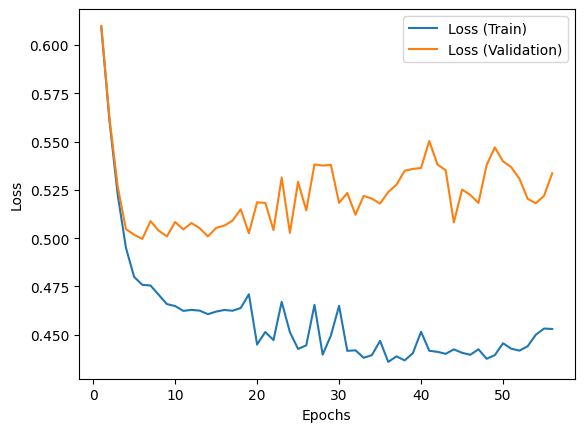


Fold 4
Epoch: 010, Loss (Train): 0.47258490324020386, Loss (Validation): 0.4708177149295807
Epoch: 020, Loss (Train): 0.47248736023902893, Loss (Validation): 0.47297537326812744
Epoch: 030, Loss (Train): 0.4653092920780182, Loss (Validation): 0.4698822498321533
Epoch: 040, Loss (Train): 0.4596662223339081, Loss (Validation): 0.48661452531814575
Epoch: 050, Loss (Train): 0.46116915345191956, Loss (Validation): 0.48380014300346375
Epoch: 060, Loss (Train): 0.4666917324066162, Loss (Validation): 0.4856921136379242
Epoch: 070, Loss (Train): 0.4684734344482422, Loss (Validation): 0.48207229375839233
Epoch: 080, Loss (Train): 0.4644116461277008, Loss (Validation): 0.47877055406570435
Stopped early at epoch 81
Evaluating on Validation set, Fold 4
Accuracy: 0.79
F1 Score: 0.00
ROC AUC: 0.49
Recall: 0.00
Confusion Matrix:
[[71  1]
 [18  0]]


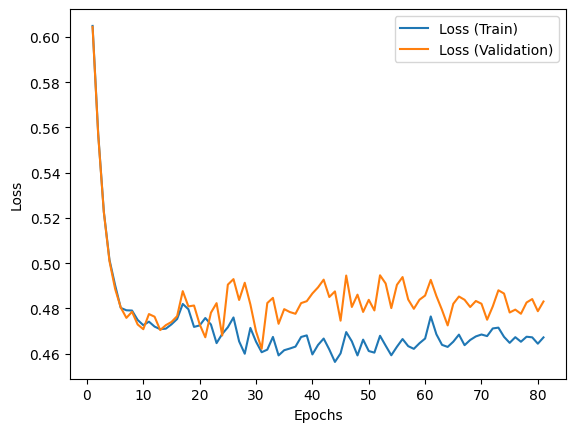

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "DeepGAT"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [YAGAT(node_dim=dataset.num_node_features,
                num_classes=dataset.num_classes,
                hidden_channels=32,
                num_layers=3,
                edge_dim=1)
         for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)

    # Try to keep model with lowest loss
    best_fold_loss = 1

    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader, clip_gradients=0.001)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model.state_dict(), f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    model.load_state_dict(torch.load(f"{model_type}-BEST-{i}.pt"))
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:
    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = YAGAT(node_dim=dataset.num_node_features,
                num_classes=dataset.num_classes,
                hidden_channels=32,
                num_layers=3,
                edge_dim=1).to(device)
best_model.load_state_dict(torch.load(f"{model_type}-BEST-{best_fold}.pt"))
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 2, with Loss 0.436):
-----
Accuracy: 0.81
F1 Score: 0.09
ROC AUC: 0.52
Recall: 0.05
Confusion Matrix:
[[91  0]
 [21  1]]

Mean:
-----
Accuracy: 0.80
F1 Score: 0.12
ROC AUC: 0.53
Recall: 0.07
Confusion Matrix:
[[89.   2. ]
 [20.4  1.6]]

STD:
-----
Accuracy: 0.01
F1 Score: 0.05
ROC AUC: 0.01
Recall: 0.04
Confusion Matrix:
[[2.0976177 2.0976177]
 [0.8       0.8      ]]


### GraphSage


#### Simple

Fold 0
Epoch: 010, Loss (Train): 0.48370546102523804, Loss (Validation): 0.47072553634643555
Epoch: 020, Loss (Train): 0.48026755452156067, Loss (Validation): 0.4649471044540405
Epoch: 030, Loss (Train): 0.4784546196460724, Loss (Validation): 0.4638504385948181
Epoch: 040, Loss (Train): 0.4779219925403595, Loss (Validation): 0.4665442705154419
Epoch: 050, Loss (Train): 0.47622692584991455, Loss (Validation): 0.46518588066101074
Epoch: 060, Loss (Train): 0.4751551151275635, Loss (Validation): 0.4651675224304199
Epoch: 070, Loss (Train): 0.47430333495140076, Loss (Validation): 0.46613773703575134
Stopped early at epoch 77
Evaluating on Validation set, Fold 0
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


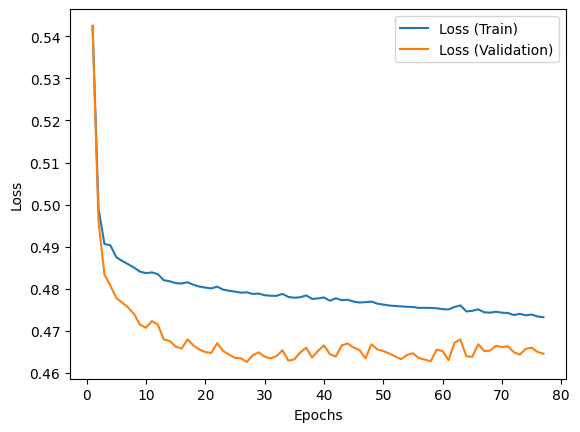


Fold 1
Epoch: 010, Loss (Train): 0.47773176431655884, Loss (Validation): 0.5004768371582031
Epoch: 020, Loss (Train): 0.47132283449172974, Loss (Validation): 0.51024329662323
Epoch: 030, Loss (Train): 0.46922004222869873, Loss (Validation): 0.5134794116020203
Epoch: 040, Loss (Train): 0.468656063079834, Loss (Validation): 0.5107384324073792
Epoch: 050, Loss (Train): 0.4667953550815582, Loss (Validation): 0.514214038848877
Stopped early at epoch 56
Evaluating on Validation set, Fold 1
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


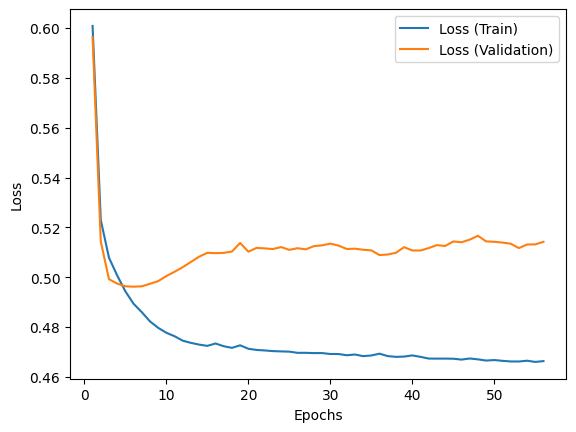


Fold 2
Epoch: 010, Loss (Train): 0.4868050515651703, Loss (Validation): 0.47176963090896606
Epoch: 020, Loss (Train): 0.48311764001846313, Loss (Validation): 0.46395009756088257
Epoch: 030, Loss (Train): 0.4832783341407776, Loss (Validation): 0.466342568397522
Epoch: 040, Loss (Train): 0.48104262351989746, Loss (Validation): 0.4652063250541687
Epoch: 050, Loss (Train): 0.4783533215522766, Loss (Validation): 0.4639487564563751
Epoch: 060, Loss (Train): 0.4767562448978424, Loss (Validation): 0.46498554944992065
Epoch: 070, Loss (Train): 0.4756125211715698, Loss (Validation): 0.4668925106525421
Epoch: 080, Loss (Train): 0.4742274582386017, Loss (Validation): 0.4680754542350769
Epoch: 090, Loss (Train): 0.47315242886543274, Loss (Validation): 0.47026634216308594
Stopped early at epoch 93
Evaluating on Validation set, Fold 2
Accuracy: 0.81
F1 Score: 0.11
ROC AUC: 0.53
Recall: 0.06
Confusion Matrix:
[[72  0]
 [17  1]]


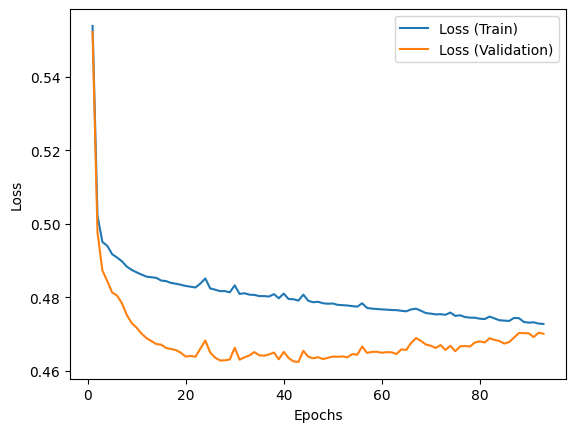


Fold 3
Epoch: 010, Loss (Train): 0.4901047646999359, Loss (Validation): 0.47732019424438477
Epoch: 020, Loss (Train): 0.48524391651153564, Loss (Validation): 0.4582383632659912
Epoch: 030, Loss (Train): 0.48403400182724, Loss (Validation): 0.4553862512111664
Epoch: 040, Loss (Train): 0.4833816885948181, Loss (Validation): 0.45665889978408813
Epoch: 050, Loss (Train): 0.48251092433929443, Loss (Validation): 0.45475634932518005
Epoch: 060, Loss (Train): 0.4832364320755005, Loss (Validation): 0.45450496673583984
Epoch: 070, Loss (Train): 0.4812520146369934, Loss (Validation): 0.45740142464637756
Epoch: 080, Loss (Train): 0.4803399443626404, Loss (Validation): 0.45599913597106934
Epoch: 090, Loss (Train): 0.47970110177993774, Loss (Validation): 0.4581252336502075
Epoch: 100, Loss (Train): 0.4786195158958435, Loss (Validation): 0.4537230432033539
Stopped early at epoch 109
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  

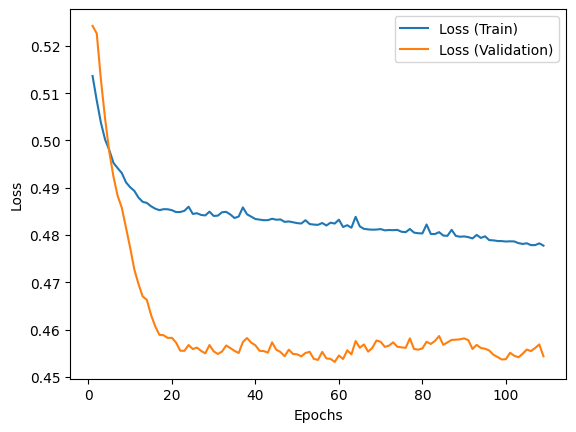


Fold 4
Epoch: 010, Loss (Train): 0.47298863530158997, Loss (Validation): 0.5096651315689087
Epoch: 020, Loss (Train): 0.46684616804122925, Loss (Validation): 0.5234197378158569
Epoch: 030, Loss (Train): 0.4652388393878937, Loss (Validation): 0.5281873941421509
Epoch: 040, Loss (Train): 0.46556878089904785, Loss (Validation): 0.5363740921020508
Epoch: 050, Loss (Train): 0.4638979434967041, Loss (Validation): 0.5293173789978027
Stopped early at epoch 53
Evaluating on Validation set, Fold 4
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


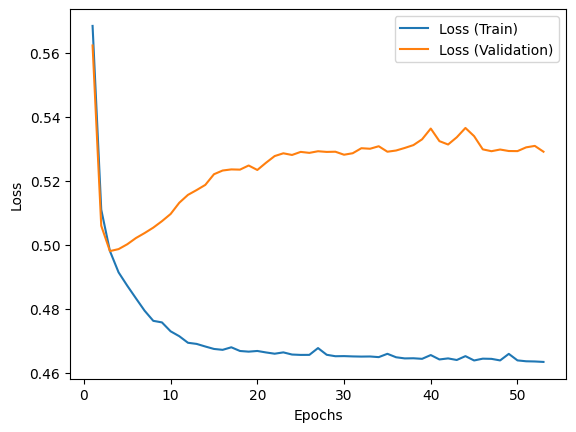

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "GraphSage"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [GraphSAGE(hidden_channels=32,num_edge_features=1) for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)
    # Try to keep model with lowest loss
    best_fold_loss = 1


    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model, f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    models[i] = torch.load(f"{model_type}-BEST-{i}.pt")
    model = models[i]
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:

    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = torch.load(f"{model_type}-BEST-{best_fold}.pt")
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 3, with Loss 0.453):
-----
Accuracy: 0.81
F1 Score: 0.09
ROC AUC: 0.52
Recall: 0.05
Confusion Matrix:
[[91  0]
 [21  1]]

Mean:
-----
Accuracy: 0.81
F1 Score: 0.05
ROC AUC: 0.51
Recall: 0.03
Confusion Matrix:
[[91.   0. ]
 [21.4  0.6]]

STD:
-----
Accuracy: 0.00
F1 Score: 0.04
ROC AUC: 0.01
Recall: 0.02
Confusion Matrix:
[[0.         0.        ]
 [0.48989795 0.48989795]]


#### Pooling

Fold 0
Epoch: 010, Loss (Train): 0.47807776927948, Loss (Validation): 0.49057403206825256
Epoch: 020, Loss (Train): 0.47465780377388, Loss (Validation): 0.4901845455169678
Epoch: 030, Loss (Train): 0.47214704751968384, Loss (Validation): 0.48981183767318726
Epoch: 040, Loss (Train): 0.46930381655693054, Loss (Validation): 0.48875102400779724
Epoch: 050, Loss (Train): 0.46658116579055786, Loss (Validation): 0.49039432406425476
Epoch: 060, Loss (Train): 0.4635518193244934, Loss (Validation): 0.49033328890800476
Epoch: 070, Loss (Train): 0.5948978662490845, Loss (Validation): 0.589417040348053
Epoch: 080, Loss (Train): 0.46611955761909485, Loss (Validation): 0.483157753944397
Epoch: 090, Loss (Train): 0.46029263734817505, Loss (Validation): 0.4855222702026367
Epoch: 100, Loss (Train): 0.45698291063308716, Loss (Validation): 0.5015391111373901
Epoch: 110, Loss (Train): 0.4575062394142151, Loss (Validation): 0.4999672770500183
Epoch: 120, Loss (Train): 0.4705297350883484, Loss (Validation):

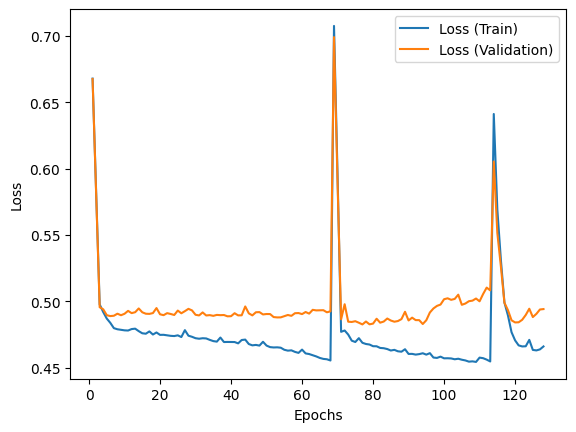


Fold 1
Epoch: 010, Loss (Train): 0.4850929081439972, Loss (Validation): 0.4635736644268036
Epoch: 020, Loss (Train): 0.48083552718162537, Loss (Validation): 0.46464481949806213
Epoch: 030, Loss (Train): 0.4789135754108429, Loss (Validation): 0.465584397315979
Epoch: 040, Loss (Train): 0.47424551844596863, Loss (Validation): 0.4626835882663727
Epoch: 050, Loss (Train): 0.4707791805267334, Loss (Validation): 0.4642660319805145
Epoch: 060, Loss (Train): 0.46784844994544983, Loss (Validation): 0.4638667702674866
Epoch: 070, Loss (Train): 0.4640347361564636, Loss (Validation): 0.46739575266838074
Epoch: 080, Loss (Train): 0.46094247698783875, Loss (Validation): 0.47341349720954895
Stopped early at epoch 86
Evaluating on Validation set, Fold 1
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


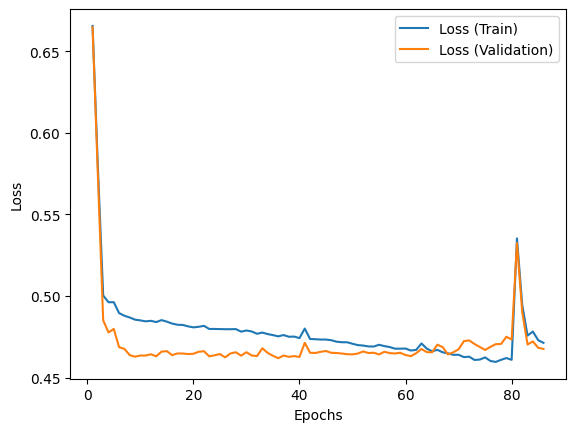


Fold 2
Epoch: 010, Loss (Train): 0.4859430491924286, Loss (Validation): 0.4649972915649414
Epoch: 020, Loss (Train): 0.48586705327033997, Loss (Validation): 0.4672938883304596
Epoch: 030, Loss (Train): 0.4814029335975647, Loss (Validation): 0.4637688994407654
Epoch: 040, Loss (Train): 0.47740599513053894, Loss (Validation): 0.46234679222106934
Epoch: 050, Loss (Train): 0.47927412390708923, Loss (Validation): 0.4672129452228546
Epoch: 060, Loss (Train): 0.4703383147716522, Loss (Validation): 0.4563696086406708
Epoch: 070, Loss (Train): 0.482387512922287, Loss (Validation): 0.4676756262779236
Epoch: 080, Loss (Train): 0.468991219997406, Loss (Validation): 0.45633119344711304
Epoch: 090, Loss (Train): 0.46935370564460754, Loss (Validation): 0.4676932692527771
Epoch: 100, Loss (Train): 0.4623427093029022, Loss (Validation): 0.4711053669452667
Epoch: 110, Loss (Train): 0.49925220012664795, Loss (Validation): 0.48553162813186646
Epoch: 120, Loss (Train): 0.48455265164375305, Loss (Validatio

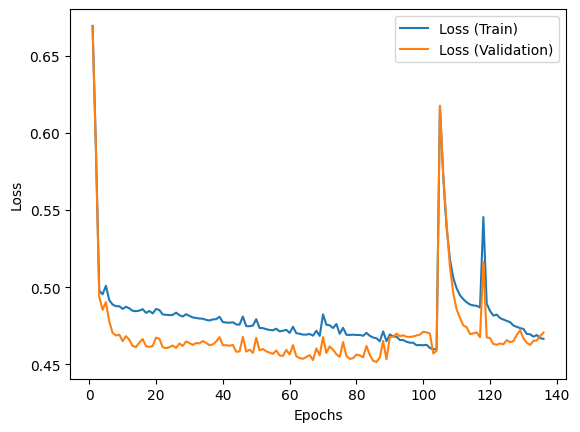


Fold 3
Epoch: 010, Loss (Train): 0.4750409722328186, Loss (Validation): 0.5031821727752686
Epoch: 020, Loss (Train): 0.4723988175392151, Loss (Validation): 0.5054165720939636
Epoch: 030, Loss (Train): 0.4683418273925781, Loss (Validation): 0.5073046088218689
Epoch: 040, Loss (Train): 0.4650081992149353, Loss (Validation): 0.5133689641952515
Epoch: 050, Loss (Train): 0.4641150236129761, Loss (Validation): 0.5143002867698669
Stopped early at epoch 57
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


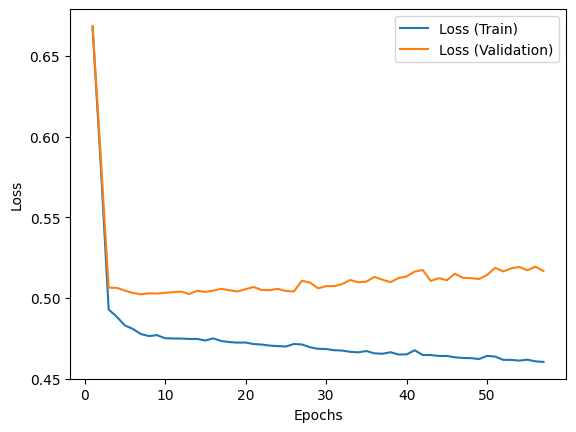


Fold 4
Epoch: 010, Loss (Train): 0.4791052043437958, Loss (Validation): 0.4985971450805664
Epoch: 020, Loss (Train): 0.47406408190727234, Loss (Validation): 0.4973529577255249
Epoch: 030, Loss (Train): 0.47137558460235596, Loss (Validation): 0.49552270770072937
Epoch: 040, Loss (Train): 0.4692985415458679, Loss (Validation): 0.49735960364341736
Epoch: 050, Loss (Train): 0.46546322107315063, Loss (Validation): 0.49904370307922363
Epoch: 060, Loss (Train): 0.6696695685386658, Loss (Validation): 0.6710720062255859
Epoch: 070, Loss (Train): 0.46793970465660095, Loss (Validation): 0.5000024437904358
Epoch: 080, Loss (Train): 0.4646639823913574, Loss (Validation): 0.4977574646472931
Stopped early at epoch 88
Evaluating on Validation set, Fold 4
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


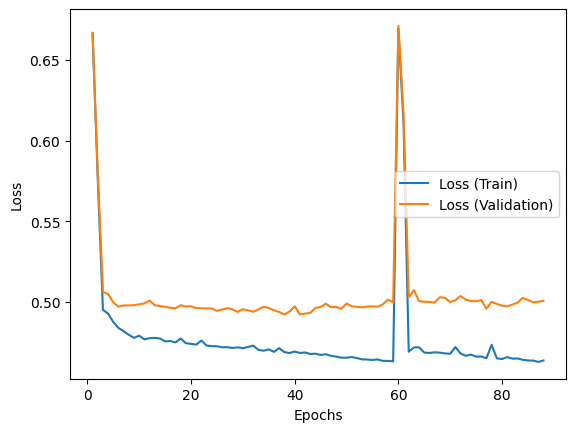

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "GRAPHSAGEPooling"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [GraphSAGEPooling(hidden_channels=32, num_edge_features=1) for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor[0.5, 1.0])
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)

    # Try to keep model with lowest loss
    best_fold_loss = 1

    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model, f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    models[i] = torch.load(f"{model_type}-BEST-{i}.pt")
    model = models[i]
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:
    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = torch.load(f"{model_type}-BEST-{best_fold}.pt")
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 2, with Loss 0.452):
-----
Accuracy: 0.81
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[91  0]
 [22  0]]

Mean:
-----
Accuracy: 0.81
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[91.  0.]
 [22.  0.]]

STD:
-----
Accuracy: 0.00
F1 Score: 0.00
ROC AUC: 0.00
Recall: 0.00
Confusion Matrix:
[[0. 0.]
 [0. 0.]]


In [ ]:
# creating a training function suitable for all models....
"""def train(model,model_type,loader):
   # Track fold with best validation loss
      best_fold = None
      best_loss = 1

  # # Stratified K-Fold Cross Validation
      num_folds = 5
      max_epochs = 1000
      train_losses = np.zeros(max_epochs)
      val_losses = np.zeros(max_epochs)
      models = [model_type(hidden_channels=32,num_edge_features=1) for x in range(num_folds)] # Create model
      for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
           print(f"Fold {i}")

      model = models[i]
      model.to(device)
      optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
      criterion = torch.nn.CrossEntropyLoss()
      early_stopper = EarlyStopper(patience=50, min_delta=1e-4)
      # Try to keep model with lowest loss
      best_fold_loss = 1


      # Create dataloaders for dataset splits
      train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
      val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

      # Train model and print performance every 100 epochs
      for epoch in range(1, max_epochs+1):
          train(model, train_loader)
          train_loss = test(model, train_loader)
          val_loss = test(model, val_loader)

          train_losses[epoch-1] = train_loss
          val_losses[epoch-1] = val_loss

          if val_loss < best_fold_loss:
              best_fold_loss = val_loss
              torch.save(model, f"{model_type}-BEST-{i}.pt")

          if val_loss < best_loss:
              best_loss = val_loss
              best_fold = i

          if (epoch % 10 == 0):
              print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

          if early_stopper.early_stop(val_loss):
               print(f"Stopped early at epoch {epoch}")
               break


      print(f"Evaluating on Validation set, Fold {i}")
      models[i] = torch.load(f"{model_type}-BEST-{i}.pt")
      model = models[i]
      print_evals(evaluate(model, val_loader))

      x = np.arange(1, epoch+1)

      plt.plot(x, train_losses[:epoch], label="Loss (Train)")
      plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.legend()
      plt.show()

      print("")
"""

'def train(model,model_type,loader):\n   # Track fold with best validation loss\n      best_fold = None\n      best_loss = 1\n\n  # # Stratified K-Fold Cross Validation\n      num_folds = 5\n      max_epochs = 1000\n      train_losses = np.zeros(max_epochs)\n      val_losses = np.zeros(max_epochs)\n      models = [model_type(hidden_channels=32,num_edge_features=1) for x in range(num_folds)] # Create model\n      for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):\n           print(f"Fold {i}")\n\n      model = models[i]\n      model.to(device)\n      optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)\n      criterion = torch.nn.CrossEntropyLoss()\n      early_stopper = EarlyStopper(patience=50, min_delta=1e-4)\n      # Try to keep model with lowest loss\n      best_fold_loss = 1\n\n\n      # Create dataloaders for dataset splits\n      train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)\n      val_loader = DataLoader(val_da

In [ ]:
#train(model,GraphSAGE,loader)

#### Deep

Fold 0
Epoch: 010, Loss (Train): 0.5027374625205994, Loss (Validation): 0.5099749565124512
Epoch: 020, Loss (Train): 0.48203930258750916, Loss (Validation): 0.4899643063545227
Epoch: 030, Loss (Train): 0.46556809544563293, Loss (Validation): 0.47895538806915283
Epoch: 040, Loss (Train): 0.4750819504261017, Loss (Validation): 0.48335209488868713
Epoch: 050, Loss (Train): 0.4634525775909424, Loss (Validation): 0.47484099864959717
Epoch: 060, Loss (Train): 0.4649597704410553, Loss (Validation): 0.4780575931072235
Epoch: 070, Loss (Train): 0.4608488976955414, Loss (Validation): 0.4818098247051239
Epoch: 080, Loss (Train): 0.4703983962535858, Loss (Validation): 0.49179011583328247
Epoch: 090, Loss (Train): 0.46186164021492004, Loss (Validation): 0.4847504496574402
Epoch: 100, Loss (Train): 0.47511783242225647, Loss (Validation): 0.48858198523521423
Stopped early at epoch 104
Evaluating on Validation set, Fold 0
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73 

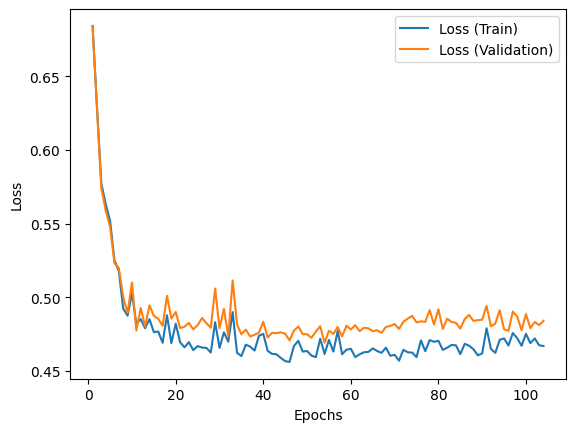


Fold 1
Epoch: 010, Loss (Train): 0.4729153513908386, Loss (Validation): 0.4468227028846741
Epoch: 020, Loss (Train): 0.4764822721481323, Loss (Validation): 0.47690850496292114
Epoch: 030, Loss (Train): 0.4666367471218109, Loss (Validation): 0.47557157278060913
Epoch: 040, Loss (Train): 0.4582064151763916, Loss (Validation): 0.4697657823562622
Epoch: 050, Loss (Train): 0.4613052308559418, Loss (Validation): 0.4600431025028229
Epoch: 060, Loss (Train): 0.45771926641464233, Loss (Validation): 0.4712156355381012
Stopped early at epoch 60
Evaluating on Validation set, Fold 1
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[73  0]
 [18  0]]


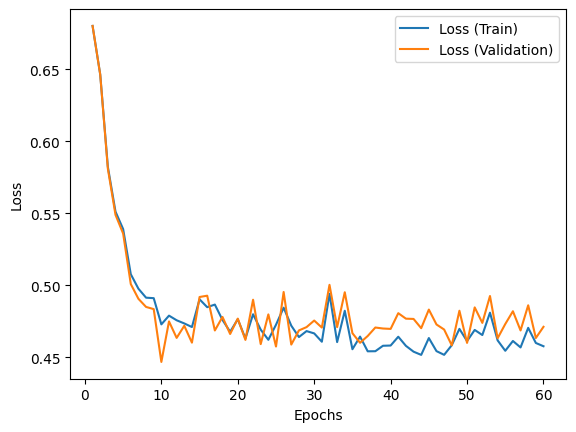


Fold 2
Epoch: 010, Loss (Train): 0.5125344395637512, Loss (Validation): 0.5524821877479553
Epoch: 020, Loss (Train): 0.5126290917396545, Loss (Validation): 0.5525826215744019
Epoch: 030, Loss (Train): 0.44088509678840637, Loss (Validation): 0.5617997050285339
Epoch: 040, Loss (Train): 0.4312862753868103, Loss (Validation): 0.5712530016899109
Epoch: 050, Loss (Train): 0.4546842873096466, Loss (Validation): 0.5427088141441345
Stopped early at epoch 59
Evaluating on Validation set, Fold 2
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


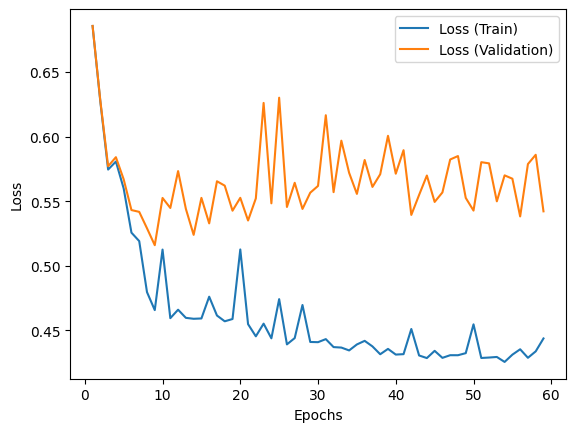


Fold 3
Epoch: 010, Loss (Train): 0.48194384574890137, Loss (Validation): 0.5210919976234436
Epoch: 020, Loss (Train): 0.4575309157371521, Loss (Validation): 0.48843273520469666
Epoch: 030, Loss (Train): 0.4703979194164276, Loss (Validation): 0.5136960744857788
Epoch: 040, Loss (Train): 0.4430035650730133, Loss (Validation): 0.5084306001663208
Epoch: 050, Loss (Train): 0.4551943242549896, Loss (Validation): 0.5211538672447205
Epoch: 060, Loss (Train): 0.44533148407936096, Loss (Validation): 0.5118187665939331
Epoch: 070, Loss (Train): 0.4504372775554657, Loss (Validation): 0.49950364232063293
Stopped early at epoch 70
Evaluating on Validation set, Fold 3
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


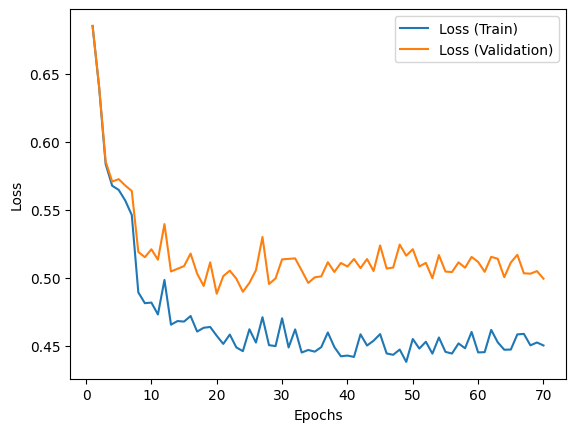


Fold 4
Epoch: 010, Loss (Train): 0.4853774607181549, Loss (Validation): 0.47389426827430725
Epoch: 020, Loss (Train): 0.4697340130805969, Loss (Validation): 0.4801299273967743
Epoch: 030, Loss (Train): 0.46861788630485535, Loss (Validation): 0.4825245440006256
Epoch: 040, Loss (Train): 0.46187740564346313, Loss (Validation): 0.4861268997192383
Epoch: 050, Loss (Train): 0.45269617438316345, Loss (Validation): 0.4868234097957611
Epoch: 060, Loss (Train): 0.4581740200519562, Loss (Validation): 0.4923998713493347
Stopped early at epoch 65
Evaluating on Validation set, Fold 4
Accuracy: 0.80
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[72  0]
 [18  0]]


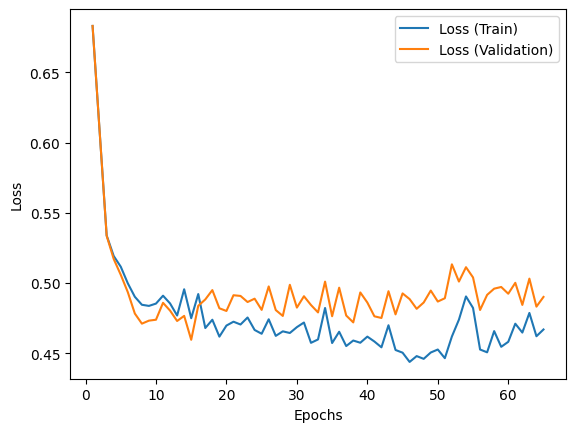

In [ ]:
# now Deep GraphSAGE is developed....
from torch_geometric.loader import DataLoader
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

model_type = "DeepGraphSAGE"

# Track fold with best validation loss
best_fold = None
best_loss = 1

# Stratified K-Fold Cross Validation
num_folds = 5
max_epochs = 1000
train_losses = np.zeros(max_epochs)
val_losses = np.zeros(max_epochs)
models = [DeepGraphSAGE(node_dim=dataset.num_node_features,
                num_classes=dataset.num_classes,
                hidden_channels=32,
                num_layers=3,
                edge_dim=1)
         for x in range(num_folds)] # Create model
for i, train_dataset, val_dataset in k_fold(dataset_train, num_folds):
    print(f"Fold {i}")

    model = models[i]
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    early_stopper = EarlyStopper(patience=50, min_delta=1e-4)

    # Try to keep model with lowest loss
    best_fold_loss = 1

    # Create dataloaders for dataset splits
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Train model and print performance every 100 epochs
    for epoch in range(1, max_epochs+1):
        train(model, train_loader, clip_gradients=0.001)

        train_loss = test(model, train_loader)
        val_loss = test(model, val_loader)

        train_losses[epoch-1] = train_loss
        val_losses[epoch-1] = val_loss

        if val_loss < best_fold_loss:
            best_fold_loss = val_loss
            torch.save(model.state_dict(), f"{model_type}-BEST-{i}.pt")

        if val_loss < best_loss:
            best_loss = val_loss
            best_fold = i

        if (epoch % 10 == 0):
            print(f'Epoch: {epoch:03d}, Loss (Train): {train_loss}, Loss (Validation): {val_loss}')

        if early_stopper.early_stop(val_loss):
            print(f"Stopped early at epoch {epoch}")
            break

    print(f"Evaluating on Validation set, Fold {i}")
    model.load_state_dict(torch.load(f"{model_type}-BEST-{i}.pt"))
    print_evals(evaluate(model, val_loader))

    x = np.arange(1, epoch+1)

    plt.plot(x, train_losses[:epoch], label="Loss (Train)")
    plt.plot(x, val_losses[:epoch], label="Loss (Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()
    plt.show()

    print("")

In [ ]:
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

model_results = {}
for metric_name in metrics:
    if metric_name == "Confusion Matrix":
        model_results[metric_name] = np.zeros((num_folds, 2, 2))
    else:
        model_results[metric_name] = np.zeros(num_folds)

for i, model in enumerate(models):
    results = evaluate(model, test_loader)
    for name, result in results.items():
        model_results[name][i] = result

best_model = DeepGraphSAGE(node_dim=dataset.num_node_features,
                num_classes=dataset.num_classes,
                hidden_channels=32,
                num_layers=3,
                edge_dim=1).to(device)
best_model.load_state_dict(torch.load(f"{model_type}-BEST-{best_fold}.pt"))
best_model
model_results_best = {}
model_results_best = evaluate(best_model, test_loader)

model_results_mean = {}
for name, results in model_results.items():
    model_results_mean[name] = np.mean(results, axis=0)

model_results_std = {}
for name, results in model_results.items():
    model_results_std[name] = np.std(results, axis=0)

print(f"Best (Fold {best_fold}, with Loss {best_loss:.3f}):\n-----")
print_evals(model_results_best)

print("")

print("Mean:\n-----")
print_evals(model_results_mean)

print("")

print("STD:\n-----")
print_evals(model_results_std)

Best (Fold 1, with Loss 0.447):
-----
Accuracy: 0.81
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[91  0]
 [22  0]]

Mean:
-----
Accuracy: 0.81
F1 Score: 0.00
ROC AUC: 0.50
Recall: 0.00
Confusion Matrix:
[[91.  0.]
 [22.  0.]]

STD:
-----
Accuracy: 0.00
F1 Score: 0.00
ROC AUC: 0.00
Recall: 0.00
Confusion Matrix:
[[0. 0.]
 [0. 0.]]
